# 1 Data Visualization

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [48]:
df = pd.read_csv("Airbnb_NYC_2019.csv")

In [49]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [50]:
# check 
df.describe()
df = df[(df['price'] > 0) & (df['price'] <= 1000) & (df['minimum_nights'] <= 60) & (df['reviews_per_month'] <= 15)]

C:\Users\williamshih\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


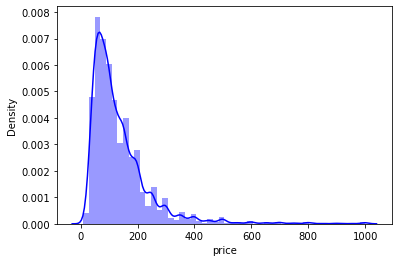

In [51]:
import seaborn as sns
price_plot = sns.distplot(df['price'],color='b')

In [52]:
df2= df[df['price']> 69.000000]

C:\Users\williamshih\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

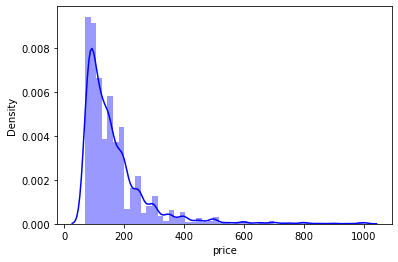

In [53]:
sns.distplot(df2['price'],color='b')

In [54]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [55]:
#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [56]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df


Brooklyn  Manhattan  Queens  Staten Island  Bronx
Stats                                                   
min        10.0       10.0    10.0           13.0   20.0
25%        60.0       90.0    50.0           50.0   45.0
50%        93.0      140.0    72.0           75.0   65.0
75%       149.0      200.0   109.0          105.0   95.0
max      1000.0     1000.0  1000.0          625.0  800.0

In [57]:
sub_6=df[df.price < 500]

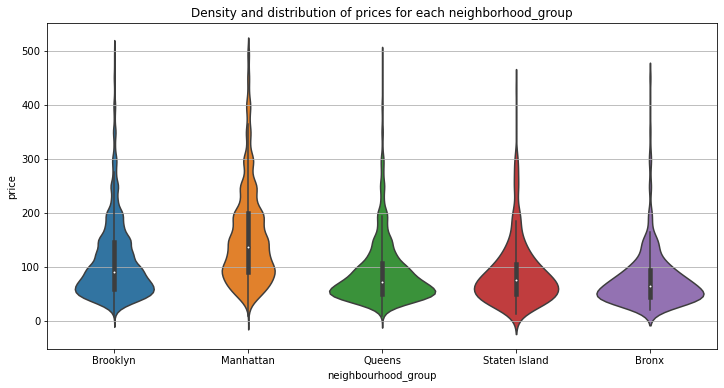

In [58]:
dims = (12, 6)
fig, ax = pyplot.subplots(figsize = dims)
viz_nei=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price', ax=ax)
viz_nei.set_title('Density and distribution of prices for each neighborhood_group')
viz_nei.grid(axis = 'y')
fig = viz_nei.figure
fig.savefig('Density.png', dpi = 400)

First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with $90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all.

In [59]:
df2.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

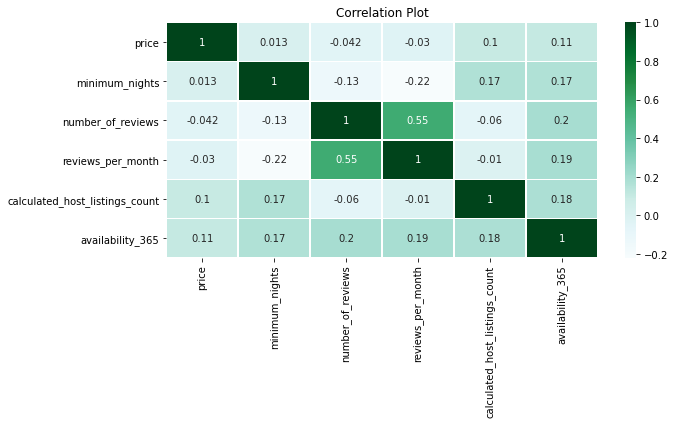

In [60]:
# numerical correlation
num_corr = df[['price','minimum_nights','number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365']].corr(method ='pearson')
dims = (10, 6)
fig, ax = pyplot.subplots(figsize = dims)
heat = sns.heatmap(num_corr, cmap="BuGn", annot = True, linewidths=0.5, ax = ax)
heat.set_title("Correlation Plot")
fig = heat.figure
fig.tight_layout()
fig.savefig("Correlation.png", dpi = 400)

reviews per month and number of reviews have relatively high correlation. Others columns don't obvious high correlation with each other

In [61]:
import matplotlib.pyplot as plt

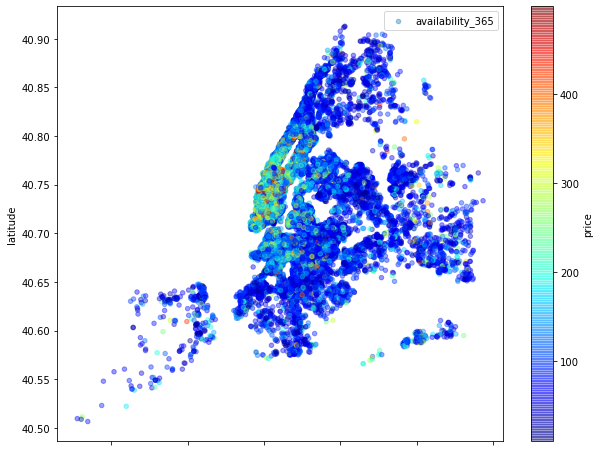

In [62]:
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

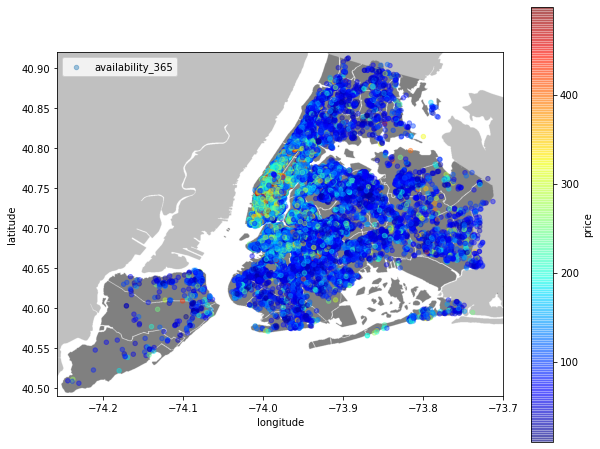

In [63]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
URL = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
try:
    import imageio
    nyc_image = imageio.imread(URL)
except:
    from PIL import Image
    import requests
    from io import BytesIO
    response = requests.get(URL)
    nyc_image = np.array(Image.open(BytesIO(response.content)))
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_image,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.grid(False)
plt.legend()
plt.savefig("Map.png", dpi = 400)
plt.show()

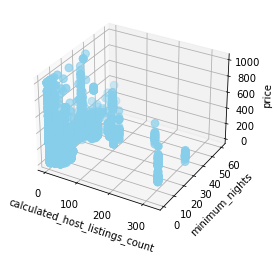

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['calculated_host_listings_count'], df['minimum_nights'], df['price'], c='skyblue', s=60)
ax.set_xlabel('calculated_host_listings_count', fontsize=10, rotation=150)
ax.set_ylabel('minimum_nights')
ax.set_zlabel('price', fontsize=10, rotation=60)
plt.savefig("HostListingsMinimumNights3D.png", dpi = 400)
plt.show()

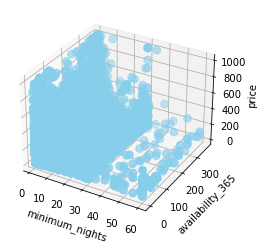

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['minimum_nights'], df['availability_365'], df['price'], c='skyblue', s=60)
ax.set_xlabel('minimum_nights', fontsize=10, rotation=150)
ax.set_ylabel('availability_365')
ax.set_zlabel('price', fontsize=10, rotation=60)
plt.savefig("MinimumAvailablity365.png", dpi = 400)
plt.show()

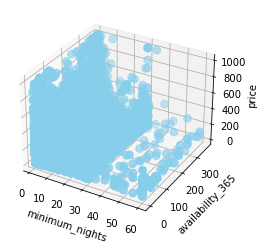

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['minimum_nights'], df['availability_365'], df['price'], c='skyblue', s=60)
ax.set_xlabel('minimum_nights', fontsize=10, rotation=150)
ax.set_ylabel('availability_365')
ax.set_zlabel('price', fontsize=10, rotation=60)
plt.show()

# 2. Data Preprocessing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import geohash as gh
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [2]:
df = pd.read_csv("Airbnb_NYC_2019.csv")

In [3]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
df.dtypes 

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
df.shape

(48895, 16)

## 2.1 Dealing with missing values

In [6]:
# check missing values 
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can keep the missing values for `name`, `host_name`, since we are not going to using these variables in the model anyways. Even if we were, it may be worth it to keep them in the model to decide what the output of a null host_name would be.
As for `last_review` and `reviews_per_month`, we believe that `last_month` is a variable that we would never include in the model. For `reviews_per_month`, we can replace all the missing values to 0, because 0 should be the correct value if a review has never been made for that listing.

The empty values for name, host_name, and last reviews can be dropped, since they seem non-menaingful to impute. We can replace the empty values for reviews per month with 0 values, becuase this means there is no review per month. 

In [7]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0.00)
df['name'] = df['name'].fillna('')
df['host_name'] = df['host_name'].fillna('')

In [8]:
#check missing values again 
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.090910   
std         20.510550          44.550582           1.597283   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

## 2.2 Omit extreme outliers and invalid values

There are also be some erroneous values in the dataset. For example, there are instances where the price is 10,000 per day despite being a single private room.

For `price`, we omit from the dataset if the price is above 3,000 per day or costs 0 per day. For `minimum_nights`, we omit if the number of minimum nights is above 60 days per month. For `reviews_per_month`, we omit if the number is above 15 per month, as it is very unlikely a listing could get 15 reviews a month, which is a review every 2 days.

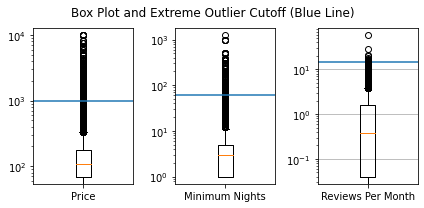

In [10]:
fig = plt.figure(figsize = (6,3))
ax1 = fig.add_subplot(1,3,1)
ax1.boxplot(df['price'])
ax1.set_yscale('log')
ax1.axhline(y = 1000)
ax1.set_xticklabels(['Price'])
ax2 = fig.add_subplot(1,3,2)
ax2.set_yscale('log')
ax2.boxplot(df['minimum_nights'])
ax2.set_xticklabels(['Minimum Nights'])
ax2.axhline(y = 60)
ax3 = fig.add_subplot(1,3,3)
ax3.set_yscale('log')
ax3.axhline(y = 15)
ax3.boxplot(df['reviews_per_month'])
ax3.set_xticklabels(['Reviews Per Month'])
plt.tight_layout()
fig.suptitle("Box Plot and Extreme Outlier Cutoff (Blue Line)", y = 0.95)
plt.grid(axis = 'y')
plt.subplots_adjust(top = 0.85)
plt.savefig('outlier.png', dpi = 400)
plt.show()

In [11]:
df_omit = df[(df['price'] > 0) & (df['price'] <= 1000) & (df['minimum_nights'] <= 60) & (df['reviews_per_month'] <= 15)]

## 2.3 What are some components that need to take into considerations for house price?

geography (`latitude`, `longitude`), `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, `availability_365`. Thus we can exclude `id`, `host_id`, `last_review` from our considerations for training data. We also exclude `neigbourhood_group` from our analysis as we believe this too closely overlaps with coordinate data.

In [12]:
# generate training data 
# drop unrelated information
# neighborhood has the same information as latitude and longitude, thus enighborhood can be dropped
df_relevant = df_omit.drop(['id','name', 'host_name', 'host_id','neighbourhood','last_review'], axis=1)

In [13]:
df_relevant.head()

neighbourhood_group  latitude  longitude        room_type  price  \
0            Brooklyn  40.64749  -73.97237     Private room    149   
1           Manhattan  40.75362  -73.98377  Entire home/apt    225   
2           Manhattan  40.80902  -73.94190     Private room    150   
3            Brooklyn  40.68514  -73.95976  Entire home/apt     89   
4           Manhattan  40.79851  -73.94399  Entire home/apt     80   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0               0.00   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [14]:
#check number of unique values in each columne to decide what processing technique to use 
df_relevant.nunique()

neighbourhood_group                   5
latitude                          18967
longitude                         14664
room_type                             3
price                               569
minimum_nights                       50
number_of_reviews                   391
reviews_per_month                   927
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## 2.4 One hot encoding for categorical variables

In [15]:
print(df_relevant['room_type'].unique())
print(df_relevant['neighbourhood_group'].unique())

['Private room' 'Entire home/apt' 'Shared room']
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


Based on the number of unique values and data type for each column. We can apply the following encoding method for text preprocessing: 

1. one hot encoding for neighbor group
2. create grouping for latitude and longitude first? then encode?
3.label encode for room type since size matters
4. conduct normalization/ standardization for all continuous data

In [16]:
#exclude label
df_relevant.drop(['price'], axis = 1, inplace= True)

In [17]:
df_relevant.head()

neighbourhood_group  latitude  longitude        room_type  minimum_nights  \
0            Brooklyn  40.64749  -73.97237     Private room               1   
1           Manhattan  40.75362  -73.98377  Entire home/apt               1   
2           Manhattan  40.80902  -73.94190     Private room               3   
3            Brooklyn  40.68514  -73.95976  Entire home/apt               1   
4           Manhattan  40.79851  -73.94399  Entire home/apt              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0               0.00                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

In [18]:
df_relevant_encode = pd.get_dummies(df_relevant, prefix = ['neighbourhood_group', 'room_type'], columns = ['neighbourhood_group', 'room_type'])
df_relevant_label = pd.get_dummies(df_relevant, prefix = ['neighbourhood_group'], columns = ['neighbourhood_group'])
le = preprocessing.LabelEncoder()
le.fit(['Shared room','Private room','Entire home/apt'])
df_relevant_label['room_type'] = le.transform(df_relevant_label['room_type'])

## 2.5 Geohash for latitude and longitude

In [19]:
# create geohash code for geographical data 
df_relevant_encode['geohash']=df_relevant_encode.apply(lambda x: gh.encode(x['latitude'], x['longitude'], precision=7), axis=1)

In [20]:
df_relevant_encode.head()

latitude  longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0  40.64749  -73.97237               1                  9               0.21   
1  40.75362  -73.98377               1                 45               0.38   
2  40.80902  -73.94190               3                  0               0.00   
3  40.68514  -73.95976               1                270               4.64   
4  40.79851  -73.94399              10                  9               0.10   

   calculated_host_listings_count  availability_365  \
0                               6               365   
1                               2               355   
2                               1               365   
3                               1               194   
4                               1                 0   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             1   
1                          0                             0   
2                          0                             0   
3                          0                             1   
4                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                  0                          0   
1                                  0                          1   
2                                  0                          0   
3                                  0                          1   
4                                  0                          1   

   room_type_Private room  room_type_Shared room  geohash  
0                       1                      0  dr5rhxw  
1                       0                      0  dr5ru6y  
2                       1                      0  dr72jmj  
3                       0                      0  dr5rmn8  
4                       0                      0  dr72j75

In [21]:
#drop latltitude longitude
df_relevant_encode.drop(['latitude', 'longitude'], axis = 1, inplace= True)

In [22]:
df_relevant_encode.head()

minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0               0.00   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  \
0                               6               365   
1                               2               355   
2                               1               365   
3                               1               194   
4                               1                 0   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             1   
1                          0                             0   
2                          0                             0   
3                          0                             1   
4                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                  0                          0   
1                                  0                          1   
2                                  0                          0   
3                                  0                          1   
4                                  0                          1   

   room_type_Private room  room_type_Shared room  geohash  
0                       1                      0  dr5rhxw  
1                       0                      0  dr5ru6y  
2                       1                      0  dr72jmj  
3                       0                      0  dr5rmn8  
4                       0                      0  dr72j75

In [23]:
df_relevant_encode.geohash.nunique()
# there are 10442 unique geographical location, should apply target encoding later

10431

In [24]:
X_col_names = df_relevant_encode.columns
X = df_relevant_encode.values.tolist()
y = df_omit['price'].tolist()

## 2.6 Split Train and Test Data (2/3, 1/3 split)

Split train data and test data for this one, with 67% in the training set and 33% in the testing set.

In [287]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

32373
15946
32373
15946


In [288]:
#create train and test dataframe for target encoding later
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)
df_test_keep = df_test
df_train.columns = X_col_names
df_test.columns = X_col_names

## 2.7 Transform Continuous Variables

Use `TargetEncoder` to encode the `geohash`. Also, transform the y-variable and x-variables if necessary into either normalized/standardized form.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

In [27]:
# target encode on geolocations, since the amount of unique values are large
# if we look at price as a target, each row with the unique value of geolocation would be replaced with the average price for the house
encoder = ce.TargetEncoder(cols=['geohash'], smoothing=0, return_df=True)

df_train['coded_geo'] = encoder.fit_transform(df_train['geohash'], y_train)
df_test['coded_geo'] = encoder.transform(df_train['geohash'])

C:\Users\williamshih\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [28]:
df_train.drop('geohash', axis=1, inplace= True)
df_test.drop('geohash', axis=1, inplace= True)

It turns out the y-variable could benefit from a log transformation, depending on what model we are using as the distribution of prices is close to a lognormal distribution.

In [195]:
one, two, three = stats.boxcox(y_train, alpha = 0.95)
print(one, two, three)

[3.46772722 3.24726153 2.84606459 ... 3.07714054 3.39164121 3.09132378] -0.1609889676842369 (-0.16143279787151976, -0.1605450980339704)


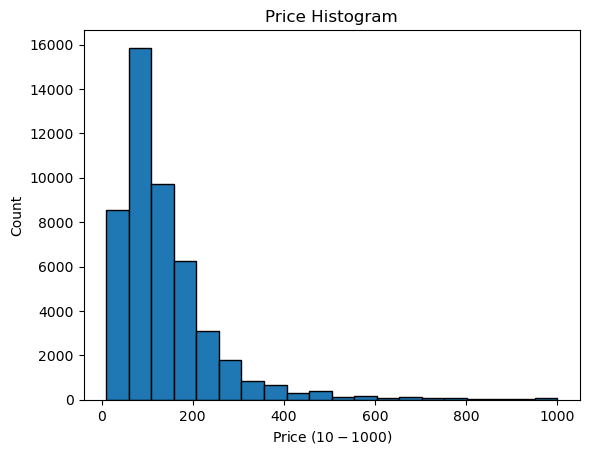

In [210]:
y_series = pd.Series(y)
plt.hist(y_series, bins = 20, histtype = 'bar', ec = 'black')
plt.title("Price Histogram")
plt.xlabel("Price ($10-$1000)")
plt.ylabel("Count")
plt.savefig("LinearPriceHist.png", dpi = 400)
plt.show()

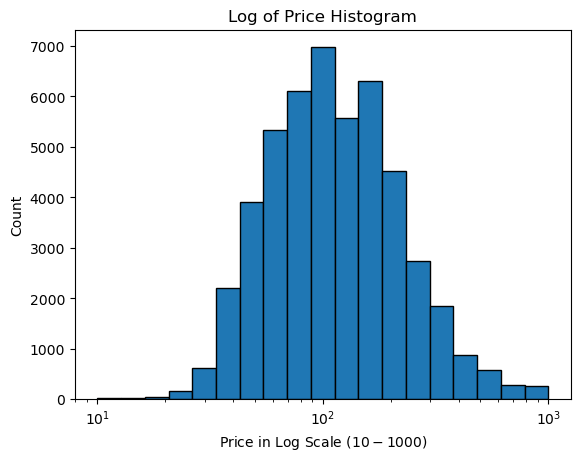

In [211]:
y_series = pd.Series(y)
logbins = np.geomspace(y_series.min(), y_series.max(), 20)
plt.hist(y_series, bins = logbins, histtype = 'bar', ec ='black')
plt.xscale('log')
plt.title("Log of Price Histogram")
plt.xlabel("Price in Log Scale ($10-$1000)")
plt.ylabel("Count")
plt.savefig("LogPriceHist.png", dpi = 400)
plt.show()

In [30]:
# concatenate train and test dataframes again for normalization or stanadardization
df_train['price'] = y_train
df_test['price'] = y_test
df_whole = pd.concat([df_train, df_test])

In [31]:
# apply standarization or normalization on continuous values based on the data distribution
to_scale = ['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365','coded_geo']
scaled_train = df_train.copy()
scaled_test = df_test.copy()
scaled_features = scaled_train[to_scale]
scaler = preprocessing.StandardScaler().fit(scaled_features)
scaled_train[to_scale] = scaler.transform(scaled_features)
scaled_test[to_scale] = scaler.transform(scaled_test[to_scale])

In [32]:
# This is extra code in case room_type uses the label encode instead of one-hot encoding
# scaler2 = preprocessing.StandardScaler().fit(df_relevant_label['room_type'].values.reshape(-1,1))
# df_relevant_label['room_type'] = scaler2.transform(df_relevant_label['room_type'].values.reshape(-1,1))

In [33]:
print(scaler.mean_, scaler.var_)
# print(scaler2.mean_, scaler2.var_)

[  5.90578569  23.45883916   1.0982646    7.14419424 111.87177586
 145.06139662] [7.97672334e+01 1.97257864e+03 2.45885778e+00 1.07521505e+03
 1.72229072e+04 4.35186541e+03]


In [34]:
scaled_train.describe()

minimum_nights  number_of_reviews  reviews_per_month  \
count    3.237300e+04       3.237300e+04       3.237300e+04   
mean    -5.897560e-16      -2.222847e-16       7.928357e-16   
std      1.000015e+00       1.000015e+00       1.000015e+00   
min     -5.492832e-01      -5.281890e-01      -7.003906e-01   
25%     -5.492832e-01      -5.056734e-01      -6.748816e-01   
50%     -4.373168e-01      -4.156112e-01      -4.580551e-01   
75%     -1.014176e-01       1.218454e-02       3.263463e-01   
max      6.056735e+00       1.363410e+01       8.597637e+00   

       calculated_host_listings_count  availability_365  \
count                    3.237300e+04      3.237300e+04   
mean                     1.951104e-16     -6.364037e-16   
std                      1.000015e+00      1.000015e+00   
min                     -1.873774e-01     -8.524468e-01   
25%                     -1.873774e-01     -8.524468e-01   
50%                     -1.873774e-01     -5.171732e-01   
75%                     -1.568808e-01      8.544009e-01   
max                      9.754535e+00      1.928801e+00   

       neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
count               32373.000000                  32373.000000   
mean                    0.023044                      0.411701   
std                     0.150045                      0.492149   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     0.000000                      1.000000   
max                     1.000000                      1.000000   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
count                   32373.000000                32373.000000   
mean                        0.439317                    0.118463   
std                         0.496312                    0.323160   
min                         0.000000                    0.000000   
25%                         0.000000                    0.000000   
50%                         0.000000                    0.000000   
75%                         1.000000                    0.000000   
max                         1.000000                    1.000000   

       neighbourhood_group_Staten Island  room_type_Entire home/apt  \
count                       32373.000000               32373.000000   
mean                            0.007475                   0.516511   
std                             0.086138                   0.499735   
min                             0.000000                   0.000000   
25%                             0.000000                   0.000000   
50%                             0.000000                   1.000000   
75%                             0.000000                   1.000000   
max                             1.000000                   1.000000   

       room_type_Private room  room_type_Shared room     coded_geo  \
count            32373.000000           32373.000000  3.237300e+04   
mean                 0.460075               0.023415  1.007733e-16   
std                  0.498411               0.151219  1.000015e+00   
min                  0.000000               0.000000 -1.895770e+00   
25%                  0.000000               0.000000 -7.096004e-01   
50%                  0.000000               0.000000 -6.036073e-02   
75%                  1.000000               0.000000  4.704330e-01   
max                  1.000000               1.000000  8.973026e+00   

              price  
count  32373.000000  
mean     141.079480  
std      116.212547  
min       10.000000  
25%       69.000000  
50%      105.000000  
75%      175.000000  
max     1000.000000

In [35]:
scaled_test.describe()

minimum_nights  number_of_reviews  reviews_per_month  \
count    15946.000000       15946.000000       15946.000000   
mean        -0.008796          -0.004718          -0.005474   
std          0.980365           1.007051           0.986433   
min         -0.549283          -0.528189          -0.700391   
25%         -0.549283          -0.505673          -0.674882   
50%         -0.325350          -0.415611          -0.458055   
75%         -0.101418           0.012185           0.326346   
max          6.056735          13.138759           8.623146   

       calculated_host_listings_count  availability_365  \
count                    15946.000000      15946.000000   
mean                         0.000772          0.000561   
std                          1.021041          0.999243   
min                         -0.187377         -0.852447   
25%                         -0.187377         -0.852447   
50%                         -0.187377         -0.524793   
75%                         -0.156881          0.862021   
max                          9.754535          1.928801   

       neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
count               15946.000000                  15946.000000   
mean                    0.020758                      0.414399   
std                     0.142576                      0.492633   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     0.000000                      1.000000   
max                     1.000000                      1.000000   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
count                   15946.000000                 15946.00000   
mean                        0.444187                     0.11263   
std                         0.496891                     0.31615   
min                         0.000000                     0.00000   
25%                         0.000000                     0.00000   
50%                         0.000000                     0.00000   
75%                         1.000000                     0.00000   
max                         1.000000                     1.00000   

       neighbourhood_group_Staten Island  room_type_Entire home/apt  \
count                       15946.000000               15946.000000   
mean                            0.008027                   0.519127   
std                             0.089237                   0.499650   
min                             0.000000                   0.000000   
25%                             0.000000                   0.000000   
50%                             0.000000                   1.000000   
75%                             0.000000                   1.000000   
max                             1.000000                   1.000000   

       room_type_Private room  room_type_Shared room     coded_geo  \
count            15946.000000           15946.000000  15946.000000   
mean                 0.456541               0.024332      0.004287   
std                  0.498123               0.154083      0.999950   
min                  0.000000               0.000000     -1.895770   
25%                  0.000000               0.000000     -0.704295   
50%                  0.000000               0.000000     -0.060361   
75%                  1.000000               0.000000      0.478843   
max                  1.000000               1.000000      8.973026   

              price  
count  15946.000000  
mean     141.892638  
std      118.074721  
min       10.000000  
25%       69.000000  
50%      105.000000  
75%      175.000000  
max     1000.000000

In [36]:
# correlation plot to decide variables 
scaled_train.corr()

minimum_nights  number_of_reviews  \
minimum_nights                           1.000000          -0.147990   
number_of_reviews                       -0.147990           1.000000   
reviews_per_month                       -0.223799           0.595509   
calculated_host_listings_count           0.308940          -0.074129   
availability_365                         0.233287           0.177020   
neighbourhood_group_Bronx               -0.044966           0.007786   
neighbourhood_group_Brooklyn            -0.068389           0.017814   
neighbourhood_group_Manhattan            0.118120          -0.045826   
neighbourhood_group_Queens              -0.051498           0.035401   
neighbourhood_group_Staten Island       -0.018318           0.015882   
room_type_Entire home/apt                0.137614          -0.000076   
room_type_Private room                  -0.132417           0.006629   
room_type_Shared room                   -0.018334          -0.021598   
coded_geo                                0.095232          -0.053203   
price                                    0.038798          -0.056272   

                                   reviews_per_month  \
minimum_nights                             -0.223799   
number_of_reviews                           0.595509   
reviews_per_month                           1.000000   
calculated_host_listings_count             -0.051926   
availability_365                            0.171753   
neighbourhood_group_Bronx                   0.035298   
neighbourhood_group_Brooklyn               -0.022078   
neighbourhood_group_Manhattan              -0.065375   
neighbourhood_group_Queens                  0.110712   
neighbourhood_group_Staten Island           0.025982   
room_type_Entire home/apt                  -0.022020   
room_type_Private room                      0.021825   
room_type_Shared room                       0.000834   
coded_geo                                  -0.069650   
price                                      -0.056097   

                                   calculated_host_listings_count  \
minimum_nights                                           0.308940   
number_of_reviews                                       -0.074129   
reviews_per_month                                       -0.051926   
calculated_host_listings_count                           1.000000   
availability_365                                         0.230374   
neighbourhood_group_Bronx                               -0.022763   
neighbourhood_group_Brooklyn                            -0.123997   
neighbourhood_group_Manhattan                            0.153666   
neighbourhood_group_Queens                              -0.033151   
neighbourhood_group_Staten Island                       -0.012915   
room_type_Entire home/apt                                0.111875   
room_type_Private room                                  -0.108345   
room_type_Shared room                                   -0.012617   
coded_geo                                                0.187275   
price                                                    0.132569   

                                   availability_365  \
minimum_nights                             0.233287   
number_of_reviews                          0.177020   
reviews_per_month                          0.171753   
calculated_host_listings_count             0.230374   
availability_365                           1.000000   
neighbourhood_group_Bronx                  0.060805   
neighbourhood_group_Brooklyn              -0.079609   
neighbourhood_group_Manhattan             -0.005056   
neighbourhood_group_Queens                 0.086739   
neighbourhood_group_Staten Island          0.052646   
room_type_Entire home/apt                 -0.009922   
room_type_Private room                    -0.007118   
room_type_Shared room                      0.056250   
coded_geo                                  0.052416   
price                                      0.119138   


In [37]:
scaled_train_X = scaled_train.loc[:, scaled_train.columns != 'price'].values.tolist()
scaled_train_y = scaled_train['price'].tolist()

scaled_test_X = scaled_test.loc[:, scaled_train.columns != 'price'].values.tolist()
scaled_test_y = scaled_test['price'].tolist()

# 3.Model training

In [38]:
# some helper functions to do plotting 
# get the raw features importance (aggregate all dummies)
def raw_feature_importance(importance_dataframe, num_pos, cate_list):
    # numercial feature importance
    num_importance = importance_dataframe.head(num_pos) 
    num_importance.reset_index(drop = True, inplace = True)

    cate_dict ={}
    for i in cate_list:
        summ = 0
        for (idx, row) in importance_dataframe.iterrows():
            if i in row.loc['Feature']:
                summ += row.loc['Importance']
        cate_dict[i] = summ 
    
    cate_importance = pd.DataFrame.from_dict(cate_dict, orient='index')
    cate_importance.rename(columns={0: 'Importance'}, inplace=True)
    cate_importance.reset_index(inplace = True)
    cate_importance.rename(index=str, columns={"index": "Feature"}, inplace = True)

    raw_feature_importances = pd.concat([num_importance, cate_importance])
    raw_feature_importances.sort_values(by=['Importance'], inplace = True, ascending=False)
    return raw_feature_importances

# feature importance
def plot_feature_importance(rank_importance,left_limit, color, alpha, size_L, size_H, title):
    plt.style.use('default')
    fig, ax = plt.subplots(1,1) 
    ax.barh(range(len(rank_importance['Feature'][0:left_limit])),rank_importance[0:left_limit]['Importance'],color=color,alpha=alpha)
    #ax.barh(rank_importance[0:left_limit]['Importance'],range(len(rank_importance['Feature'][0:left_limit])),color=color,alpha=alpha)
    ax.set_yticks(range(rank_importance[0:left_limit].shape[0]))
    ax.set_yticklabels(rank_importance[0:left_limit]['Feature'], rotation='horizontal', fontsize=12)    
    ax.set_ylabel('Features', fontsize = 16)
    ax.set_xlabel('Feature importance', fontsize = 16)
    ax.set_title(title, fontsize = 16)
    fig.set_size_inches(size_L, size_H)
    plt.tight_layout()
    plt.grid(axis = 'x')
    plt.savefig(title + '.png', dpi = 400)
    plt.show()

# 3.1  Quick LASSO for baseline
* Use Lasso regression for quick baseline
* Mean absolute percentage error (MAPE), mean absolute error (MAE), and the Mean absolute Deviation (MAD) are used as evaluation metric. 
* R-squared (R2_score), Mean Squared Log Error (MSLE), Mean Squared Error (MSE), and Median Absolute Error are used as additional evaluation metrics.

In [39]:
import sklearn.metrics
import sklearn
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
# Lasso model select the optimized hyperparameters
def lasso_best(scaled_train_X, scaled_train_y, title):
    alphas = np.logspace(-4,2,num=50)
    #Return numbers spaced evenly on a log scale.
    scores = np.empty_like(alphas)
    opt_a = float('-inf')
    max_score = float('-inf')
    for i, a in enumerate(alphas):
        lasso = Lasso(max_iter = 100000, tol = 0.01)
        lasso.set_params(alpha = a)
        lasso.fit(scaled_train_X, scaled_train_y)
        scores[i] = lasso.score(scaled_test_X, scaled_test_y) # get scores for test dataset
        # lasso.score() Return the coefficient of determination R^2 of the prediction.
        # The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
        # A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
        if scores[i] > max_score: # lasso.score is r2 
            max_score = scores[i]
            opt_a = a
            lasso_save = lasso
    plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
    plt.xlabel('Alpha')
    plt.ylabel('Score')
    plt.xscale('log')
    plt.grid(True)
    plt.title('Score vs. Alpha ('+ title +')')
    plt.savefig(title +'scorealpha.png', dpi = 400)
    plt.show()
    print ('The optimized alpha and score of Lasso linear is: ', opt_a, max_score)
    print(opt_a)
    return opt_a

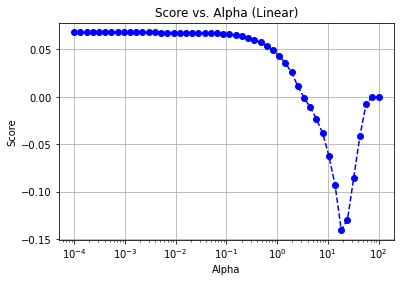

The optimized alpha and score of Lasso linear is:  0.0001 0.0679395479648699
0.0001


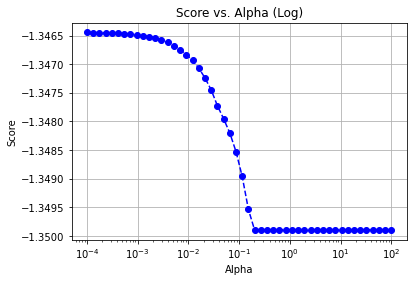

The optimized alpha and score of Lasso linear is:  0.0001 -1.3464462578298924
0.0001


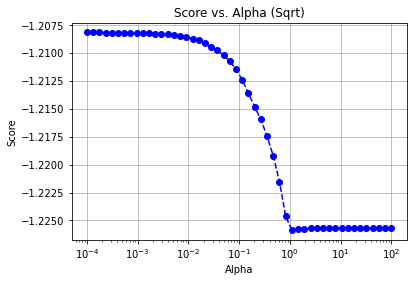

The optimized alpha and score of Lasso linear is:  0.0001 -1.2081733718961942
0.0001


In [41]:
opt_a = lasso_best(scaled_train_X, scaled_train_y, 'Linear')
opt_a_log = lasso_best(scaled_train_X, np.log(scaled_train_y), 'Log')
opt_a_sqrt = lasso_best(scaled_train_X, np.sqrt(scaled_train_y), 'Sqrt')

In [42]:
# use  optimal alpha, re-train the model
# Linear
lasso_f = Lasso(alpha = opt_a, max_iter = 100000)
lasso_f.fit(scaled_train_X, scaled_train_y)
lasso_pred = lasso_f.predict(scaled_test_X)
# Log
lasso_f_log = Lasso(alpha = opt_a_log, max_iter = 100000)
lasso_f_log.fit(scaled_train_X, np.log(scaled_train_y))
lasso_pred_log = lasso_f_log.predict(scaled_test_X)
# Sqrt
lasso_f_sqrt = Lasso(alpha = opt_a_sqrt, max_iter = 100000)
lasso_f_sqrt.fit(scaled_train_X, np.sqrt(scaled_train_y))
lasso_pred_sqrt = lasso_f_sqrt.predict(scaled_test_X)

In [43]:
import yellowbrick
from yellowbrick.regressor import PredictionError

In [44]:
# define MAD_ratio, and evalution result
def mean_absolute_devation(arr):
    # Calculate the sum of absolute deviation about mean.
    absSum = 0
    for i in range(0, len(arr)):
        absSum = absSum + abs(arr[i] - np.mean(arr))
    return absSum / len(arr)

def mean_absolute_deviation_ratio(y_true, y_pred):
    return mean_absolute_devation(y_pred)/(mean_absolute_devation(y_true)+0.1)

def evaluate(test_price, prediction):
    MAPE = mean_absolute_percentage_error(test_price,prediction)
    print('MAPE of 2019 Airbnb price is {}'.format(MAPE))  
    MAE = mean_absolute_error(test_price, prediction)
    print('MAE of 2019 Airbnb price is {}'.format(MAE))   
    MAD_ratio = mean_absolute_deviation_ratio(test_price,prediction)
    print('MAD ratio of prediction in 2019 Airbnb price is {}'.format(MAD_ratio))
    r2 = r2_score(test_price, prediction)
    print('R^2 of 2019 Airbnb price is {}'.format(r2))
    MSLE = mean_squared_log_error(test_price, prediction)
    print('MSLE of 2019 Airbnb price is {}'.format(MSLE))
    Median = median_absolute_error(test_price, prediction)
    print('Median Absolute Error of 2019 Airbnb price is {}'.format(Median))
    MSError = mean_squared_error(test_price, prediction)
    print('MSE of 2019 Airbnb price is {}'.format(MSError))
    return([MAPE, MAE, MAD_ratio, r2, MSLE, Median, MSError])
 
    
def plot_diff(test_price, prediction, title1, title2):    # plot the pred vs. actual
    plt.plot(prediction,'o', color='red', alpha=0.3, label = 'predicted price')
    plt.plot(test_price,'*', color='blue', alpha=0.5, label = 'actual price')
    plt.title(title1)
    plt.legend(loc='upper right')
    plt.show()

    plt.plot((prediction - test_price)
             ,'v', color='green')
    plt.title(title2)
    plt.show()

def visualize_diff(test_price, prediction, model_name):
    plt.plot(test_price, color = "red", alpha=0.3, label = 'actual price')
    plt.plot(prediction, color = "green", alpha=0.5, label = 'predicted_price' )
    plt.title("Pred vs. Actual in {}".format(model_name))
    plt.legend(loc="upper right")
    plt.show()
    
def visualize_boxplot_diff(test_price, prediction, split_by, cut_offs, model_name, group_name):
    plt.style.use('default')
    if cut_offs != None:
        split_by = pd.cut(split_by, bins = cut_offs[0], labels = cut_offs[1])
    residual = test_price - prediction
    fig, ax = plt.subplots(figsize = (10, 5))
    data = pd.DataFrame({'Residuals':residual, group_name:split_by})
    data.boxplot(column = ['Residuals'], by = group_name, ax = ax)
    fig.suptitle('Boxplot of Residuals Grouped by ' + model_name)
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.savefig(model_name + '.png', dpi = 400)
    plt.show()
    
def visualize_regression_diff(test_price, prediction, model_name):
    plt.style.use('default')
    model_name = 'Actual vs Residuals for ' + model_name
    residual = test_price - prediction
    coef = np.polyfit(test_price, residual, 1)
    function = np.poly1d(coef)
    plt.plot(test_price, residual, 'yo', test_price, function(test_price), '--k')
    plt.title(model_name)
    plt.xlabel('Actual Price')
    plt.ylabel('Residual Price')
    plt.grid()
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.savefig(model_name + '_diff.png', dpi = 400)
    plt.show()
    
def visualize_regression_actual(test_price, prediction, model_name):
    plt.style.use('default')
    model_name = 'Actual vs Prediction for ' + model_name
    coef = np.polyfit(test_price, prediction, 1)
    function = np.poly1d(coef)
    plt.plot(test_price, prediction, 'yo', test_price, function(test_price), '--k')
    plt.title(model_name)
    plt.xlabel('Actual Price')
    plt.ylabel('Prediction Price')
    plt.grid()
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.savefig(model_name + '_actual.png', dpi = 400)
    plt.show()
    

In [100]:
eval_grid = np.array([[0.000]*7 for i in range(17)])
eval_grid[0,:] = evaluate(scaled_test_y, np.mean(scaled_test_y).repeat(len(scaled_test_y)))

MAPE of 2019 Airbnb price is 0.8052693039244664
MAE of 2019 Airbnb price is 78.55573516343233
MAD ratio of prediction in 2019 Airbnb price is 0.0
R^2 of 2019 Airbnb price is 0.0
MSLE of 2019 Airbnb price is 0.4958395063803054
Median Absolute Error of 2019 Airbnb price is 61.89263765207576
MSE of 2019 Airbnb price is 13940.765345269056


In [106]:
lasso_pred = np.array([10 if i < 10 else i for i in lasso_pred])
lasso_pred_log = np.array([2.3 if i < 2.3 else i for i in lasso_pred_log])
lasso_pred_sqrt = np.array([3.16 if i < 3.16 else i for i in lasso_pred_sqrt])
eval_grid[1,:] = evaluate(scaled_test_y, lasso_pred)
eval_grid[2,:] = evaluate(scaled_test_y, np.exp(lasso_pred_log))
eval_grid[3,:] = evaluate(scaled_test_y, np.square(lasso_pred_sqrt))

MAPE of 2019 Airbnb price is 0.6453609994498701
MAE of 2019 Airbnb price is 72.18386876959124
MAD ratio of prediction in 2019 Airbnb price is 0.6623722855462792
R^2 of 2019 Airbnb price is 0.06850741892715428
MSLE of 2019 Airbnb price is 0.4335030872330056
Median Absolute Error of 2019 Airbnb price is 48.203455318522295
MSE of 2019 Airbnb price is 12985.719493595554
MAPE of 2019 Airbnb price is 0.4512752615258362
MAE of 2019 Airbnb price is 61.614727652823525
MAD ratio of prediction in 2019 Airbnb price is 0.5711622987259765
R^2 of 2019 Airbnb price is 0.11816067755286197
MSLE of 2019 Airbnb price is 0.291150659374325
Median Absolute Error of 2019 Airbnb price is 33.240010638363756
MSE of 2019 Airbnb price is 12293.515066466605
MAPE of 2019 Airbnb price is 0.5212490047790349
MAE of 2019 Airbnb price is 64.78850006610216
MAD ratio of prediction in 2019 Airbnb price is 0.5972912254428446
R^2 of 2019 Airbnb price is 0.12474971960975267
MSLE of 2019 Airbnb price is 0.32375384945882557
Medi

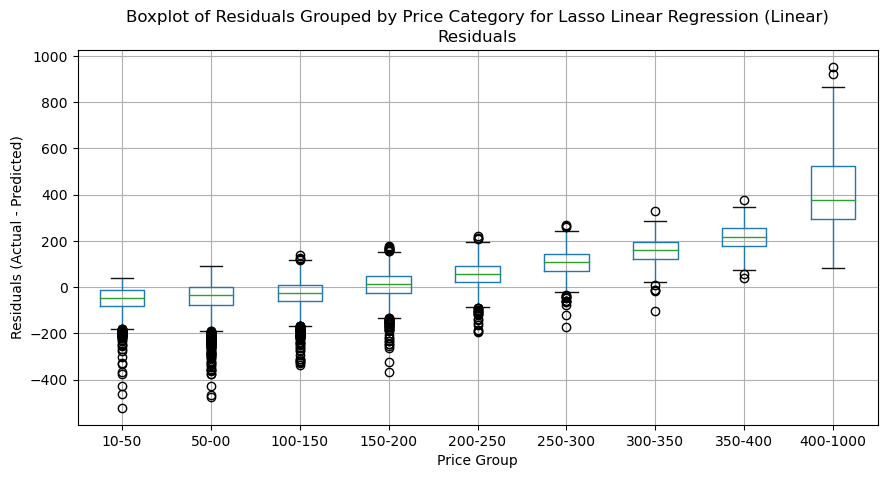

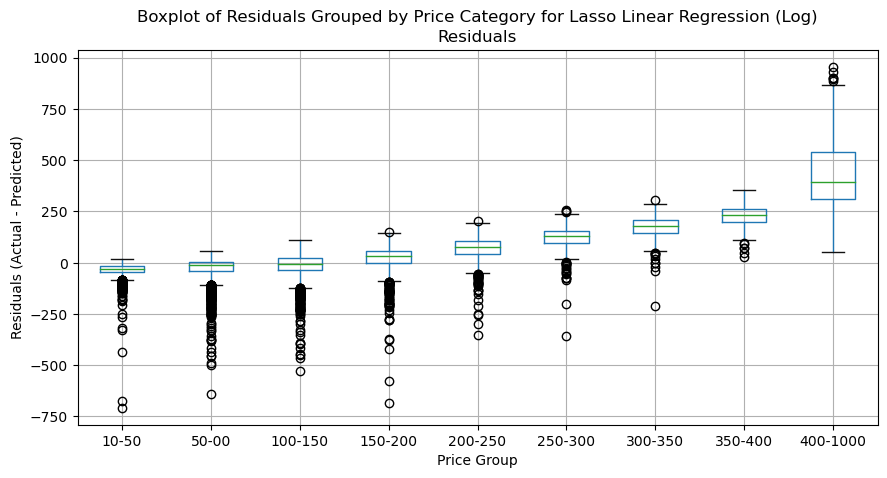

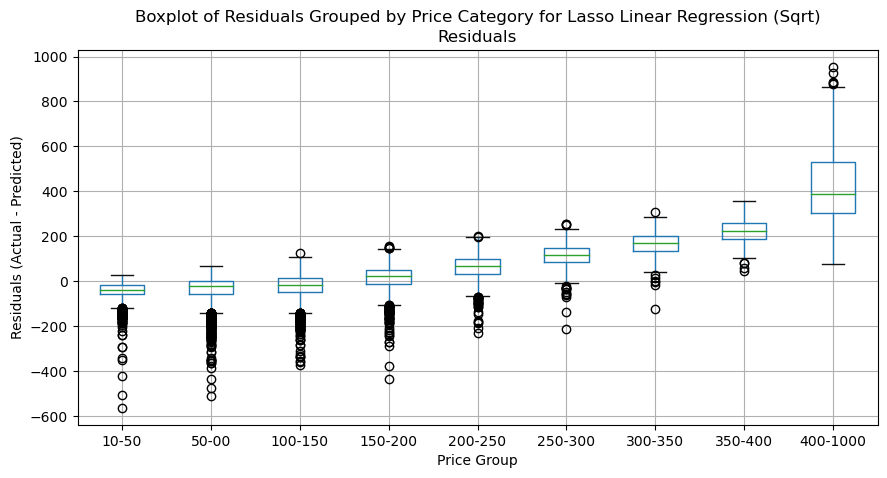

In [47]:
visualize_boxplot_diff(scaled_test_y, lasso_pred, scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for Lasso Linear Regression (Linear)', 'Price Group')
visualize_boxplot_diff(scaled_test_y, np.exp(lasso_pred_log), scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for Lasso Linear Regression (Log)', 'Price Group')
visualize_boxplot_diff(scaled_test_y, np.square(lasso_pred_sqrt), scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for Lasso Linear Regression (Sqrt)', 'Price Group')

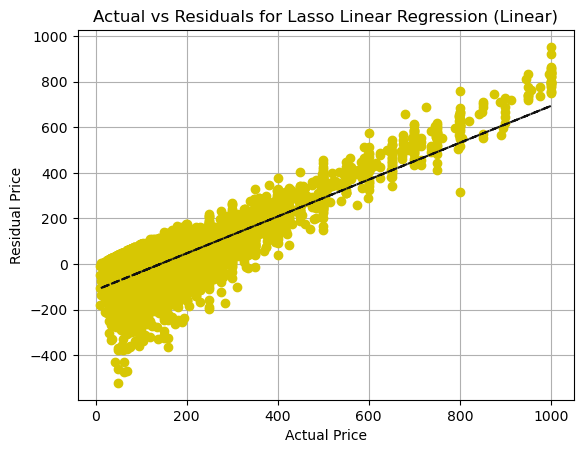

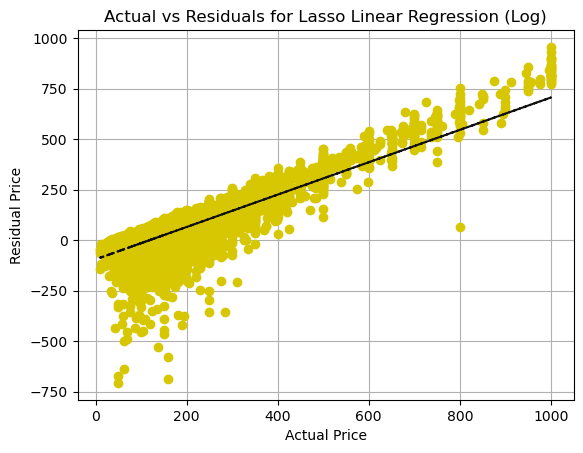

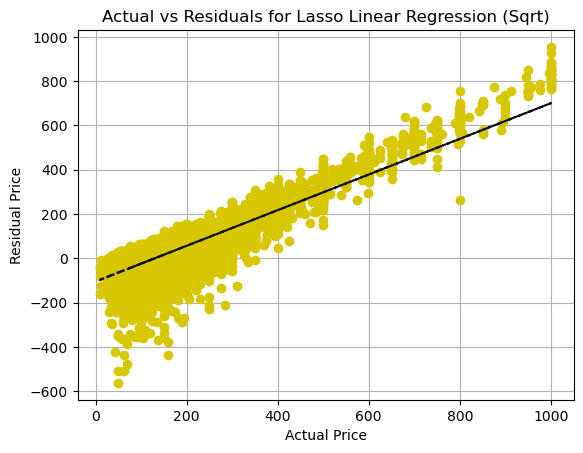

In [48]:
visualize_regression_diff(scaled_test_y, lasso_pred, 'Lasso Linear Regression (Linear)')
visualize_regression_diff(scaled_test_y, np.exp(lasso_pred_log), 'Lasso Linear Regression (Log)')
visualize_regression_diff(scaled_test_y, np.square(lasso_pred_sqrt), 'Lasso Linear Regression (Sqrt)')

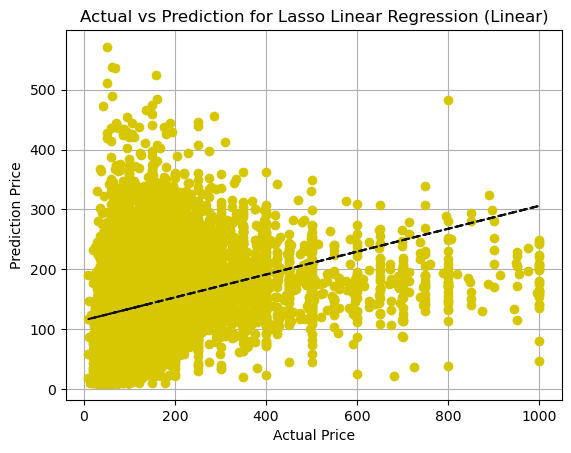

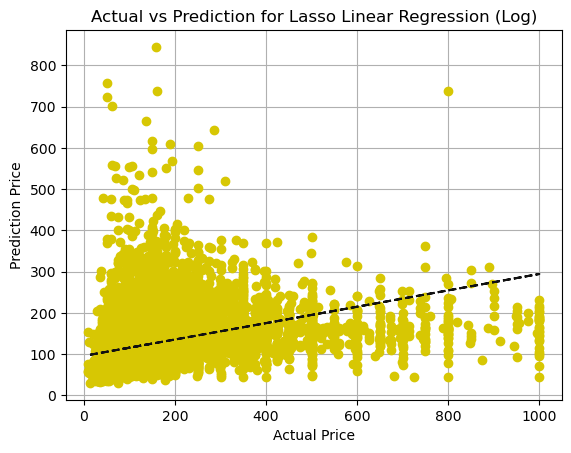

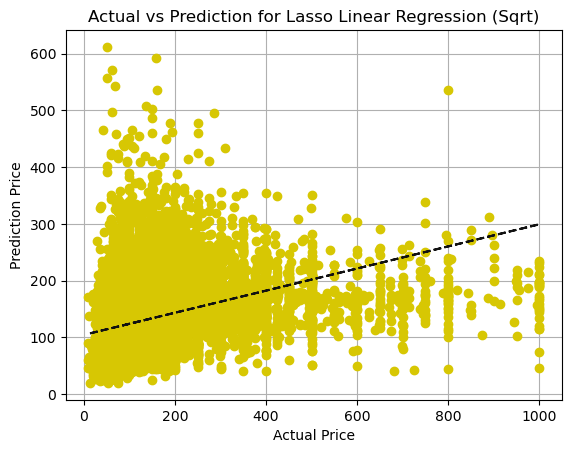

In [49]:
visualize_regression_actual(scaled_test_y, lasso_pred, 'Lasso Linear Regression (Linear)')
visualize_regression_actual(scaled_test_y, np.exp(lasso_pred_log), 'Lasso Linear Regression (Log)')
visualize_regression_actual(scaled_test_y, np.square(lasso_pred_sqrt), 'Lasso Linear Regression (Sqrt)')

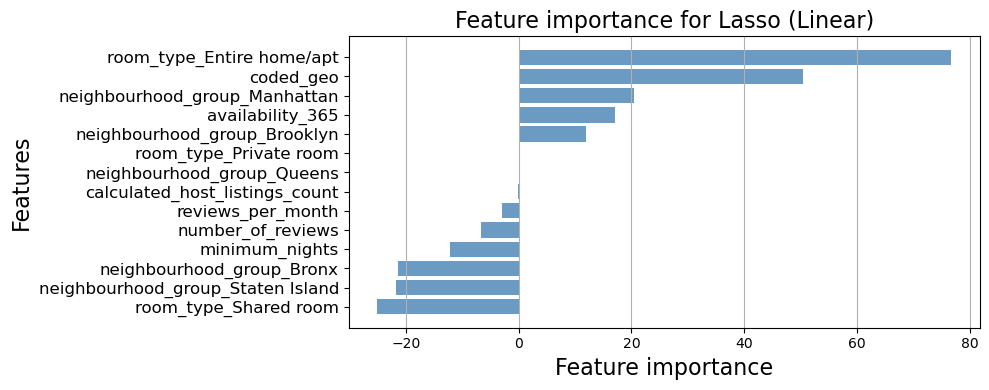

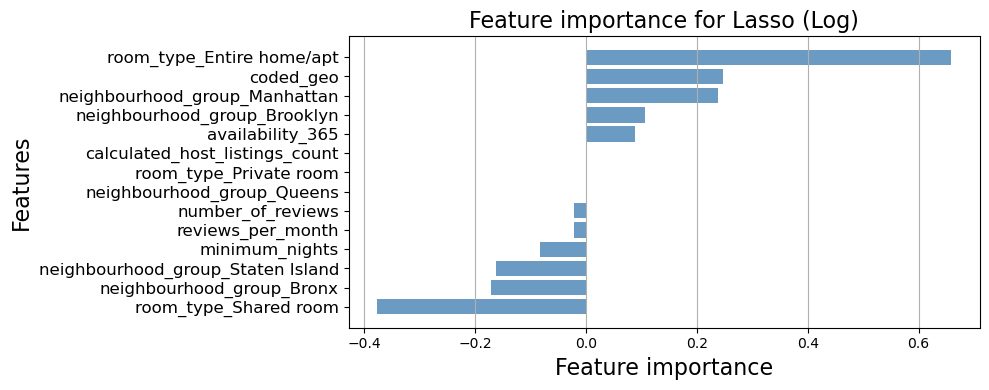

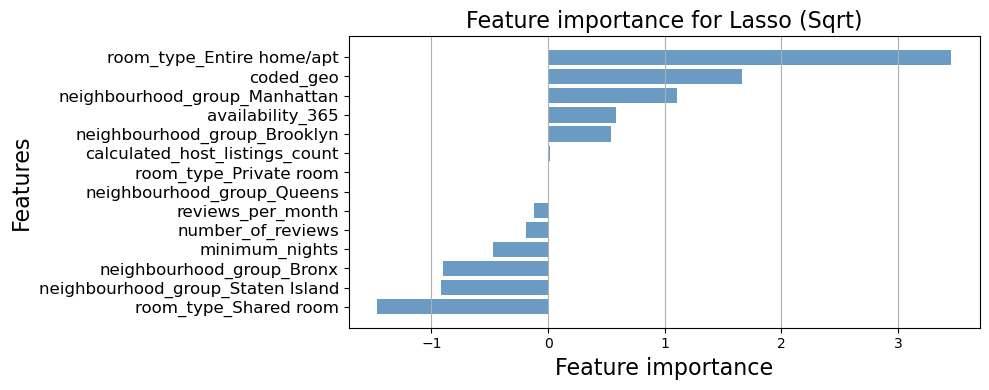

In [253]:
# get important features from linear regression
def get_importance_lasso(lasso_f, scaled_train, name):
    importance_lr_best = lasso_f.coef_
    names_lr_best = scaled_train.loc[:, scaled_train.columns != 'price'].columns.tolist()
    df_importantce_lr_best = pd.DataFrame({'Feature':names_lr_best, 'Importance':importance_lr_best})
    # plot feature importance
    rank_importance_lr_best = df_importantce_lr_best.sort_values('Importance', ascending=True)
    plot_feature_importance(rank_importance_lr_best,15, 'steelblue', 0.8, 10, 4, name)
get_importance_lasso(lasso_f, scaled_train, 'Feature importance for Lasso (Linear)')
get_importance_lasso(lasso_f_log, scaled_train, 'Feature importance for Lasso (Log)')
get_importance_lasso(lasso_f_sqrt, scaled_train, 'Feature importance for Lasso (Sqrt)')

# 3.2 OLS

OLS is added to see if LASSO performs better than OLS and the differences between the two results.

In [51]:
# Linear
linear_f = LinearRegression()
linear_f.fit(scaled_train_X, scaled_train_y)
linear_pred = linear_f.predict(scaled_test_X)
# Log 
linear_f_log = LinearRegression()
linear_f_log.fit(scaled_train_X, np.log(scaled_train_y))
linear_pred_log = linear_f_log.predict(scaled_test_X)
# Sqrt
linear_f_sqrt = LinearRegression()
linear_f_sqrt.fit(scaled_train_X, np.sqrt(scaled_train_y))
linear_pred_sqrt = linear_f_sqrt.predict(scaled_test_X)

In [110]:
linear_pred = np.array([10 if i < 10 else i for i in linear_pred])
linear_pred_log = np.array([2.3 if i < 2.3 else i for i in linear_pred_log])
linear_pred_sqrt = np.array([3.16 if i < 3.16 else i for i in linear_pred_sqrt])
eval_grid[4,:] = evaluate(scaled_test_y, linear_pred)
eval_grid[5,:] = evaluate(scaled_test_y, np.exp(linear_pred_log))
eval_grid[6,:] = evaluate(scaled_test_y, np.square(linear_pred_sqrt))

MAPE of 2019 Airbnb price is 0.645359514985311
MAE of 2019 Airbnb price is 72.1838146867491
MAD ratio of prediction in 2019 Airbnb price is 0.6623752131737218
R^2 of 2019 Airbnb price is 0.06850899287630141
MSLE of 2019 Airbnb price is 0.4335040663062703
Median Absolute Error of 2019 Airbnb price is 48.2039703637282
MSE of 2019 Airbnb price is 12985.697551539828
MAPE of 2019 Airbnb price is 0.45114942919946266
MAE of 2019 Airbnb price is 61.604171576499716
MAD ratio of prediction in 2019 Airbnb price is 0.5716229268154599
R^2 of 2019 Airbnb price is 0.11846890354233175
MSLE of 2019 Airbnb price is 0.2910325538866568
Median Absolute Error of 2019 Airbnb price is 33.22558898674096
MSE of 2019 Airbnb price is 12289.218160274095
MAPE of 2019 Airbnb price is 0.5212140468720735
MAE of 2019 Airbnb price is 64.78644063479211
MAD ratio of prediction in 2019 Airbnb price is 0.5973652494958726
R^2 of 2019 Airbnb price is 0.12479859173025876
MSLE of 2019 Airbnb price is 0.32373703621664557
Median 

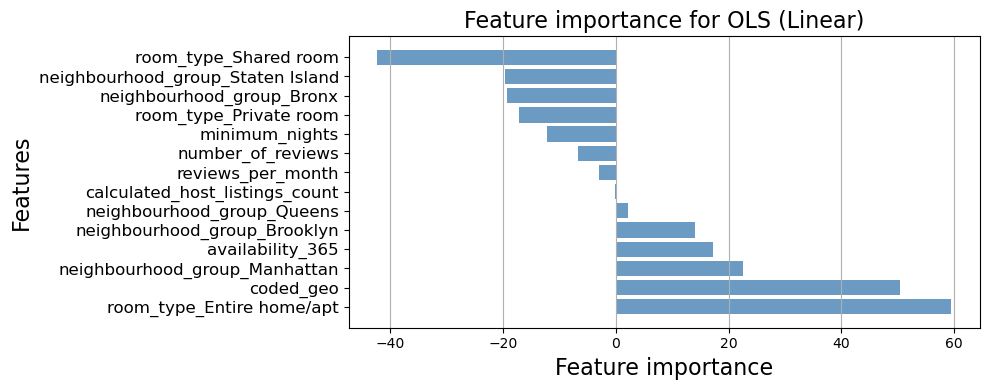

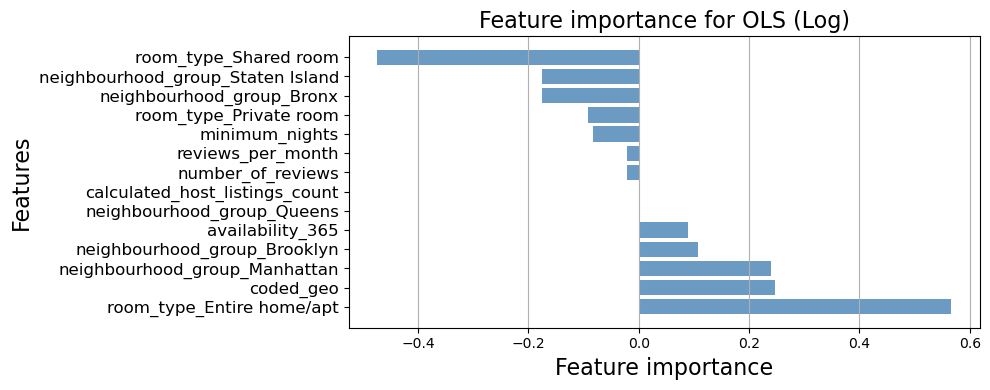

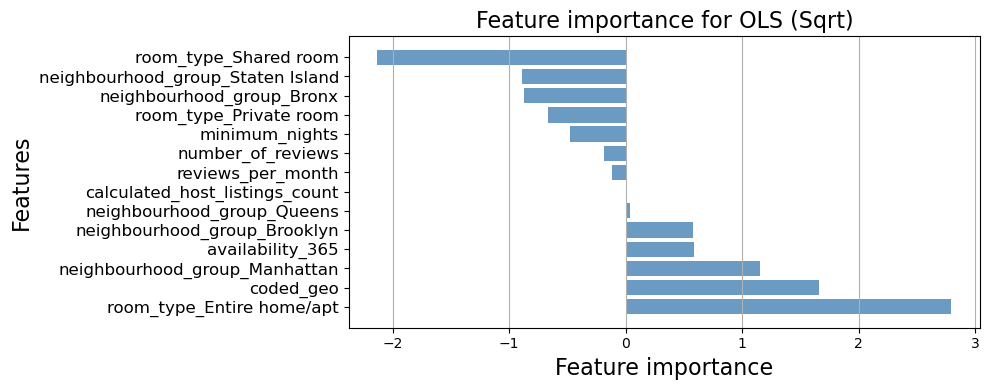

In [209]:
get_importance_lasso(linear_f, scaled_train, 'Feature importance for OLS (Linear)')
get_importance_lasso(linear_f_log, scaled_train, 'Feature importance for OLS (Log)')
get_importance_lasso(linear_f_sqrt, scaled_train, 'Feature importance for OLS (Sqrt)')

# 3.3 KNN

In [53]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [54]:
#parameters = { 'n_neighbors':[10,12,14,16,20,25,30,35,40,45,50,55,60,65,70]}
#25, 40, 25 worked best for Linear, Log, and Sqrt respectively
parameters = { 'n_neighbors':[20,25,30,35,40] 
}
# Linear
Grid_KNN = GridSearchCV(KNeighborsRegressor(),parameters, cv=5)
Grid_KNN.fit(scaled_train_X, scaled_train_y)
print_grid_search_metrics(Grid_KNN)
best_KNN_model = Grid_KNN.best_estimator_
# Log
Grid_KNN = GridSearchCV(KNeighborsRegressor(),parameters, cv=5)
Grid_KNN.fit(scaled_train_X, np.log(scaled_train_y))
print_grid_search_metrics(Grid_KNN)
best_KNN_model_log = Grid_KNN.best_estimator_
# Sqrt
Grid_KNN = GridSearchCV(KNeighborsRegressor(),parameters, cv=5)
Grid_KNN.fit(scaled_train_X, np.sqrt(scaled_train_y))
print_grid_search_metrics(Grid_KNN)
best_KNN_model_sqrt = Grid_KNN.best_estimator_

Best score: 0.4800937524298815
Best parameters set:
n_neighbors:40
Best score: 0.6230012599283101
Best parameters set:
n_neighbors:25
Best score: 0.572176684001171
Best parameters set:
n_neighbors:40


In [55]:
knn_pred = best_KNN_model.predict(scaled_test_X)
knn_pred_log = best_KNN_model_log.predict(scaled_test_X)
knn_pred_sqrt = best_KNN_model_sqrt.predict(scaled_test_X)

In [111]:
knn_pred = np.array([10 if i < 10 else i for i in knn_pred])
knn_pred_log = np.array([2.3 if i < 2.3 else i for i in knn_pred_log])
knn_pred_sqrt = np.array([3.16 if i < 3.16 else i for i in knn_pred_sqrt])
eval_grid[7,:] = evaluate(scaled_test_y, knn_pred)
eval_grid[8,:] = evaluate(scaled_test_y, np.exp(knn_pred_log))
eval_grid[9,:] = evaluate(scaled_test_y, np.square(knn_pred_sqrt))

MAPE of 2019 Airbnb price is 0.5398022995164553
MAE of 2019 Airbnb price is 65.41853442869684
MAD ratio of prediction in 2019 Airbnb price is 0.686827014103283
R^2 of 2019 Airbnb price is 0.1072570495652001
MSLE of 2019 Airbnb price is 0.3245455868905331
Median Absolute Error of 2019 Airbnb price is 37.275000000000006
MSE of 2019 Airbnb price is 12445.519985654708
MAPE of 2019 Airbnb price is 0.4492511737495444
MAE of 2019 Airbnb price is 60.90785508304583
MAD ratio of prediction in 2019 Airbnb price is 0.6191417148252534
R^2 of 2019 Airbnb price is 0.14221298975553398
MSLE of 2019 Airbnb price is 0.29271962664043955
Median Absolute Error of 2019 Airbnb price is 31.949410229958836
MSE of 2019 Airbnb price is 11958.207426038005
MAPE of 2019 Airbnb price is 0.4885810351903921
MAE of 2019 Airbnb price is 62.58899157837894
MAD ratio of prediction in 2019 Airbnb price is 0.6476053263722958
R^2 of 2019 Airbnb price is 0.13495251592274904
MSLE of 2019 Airbnb price is 0.3033806561111084
Median

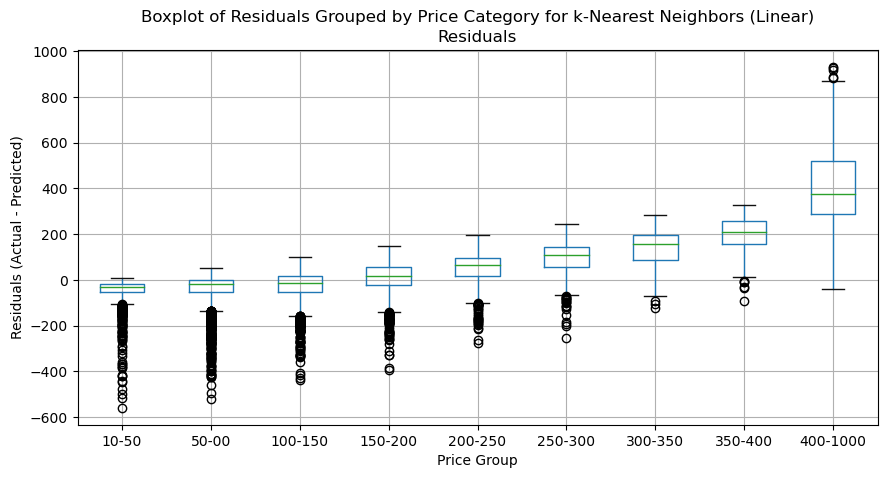

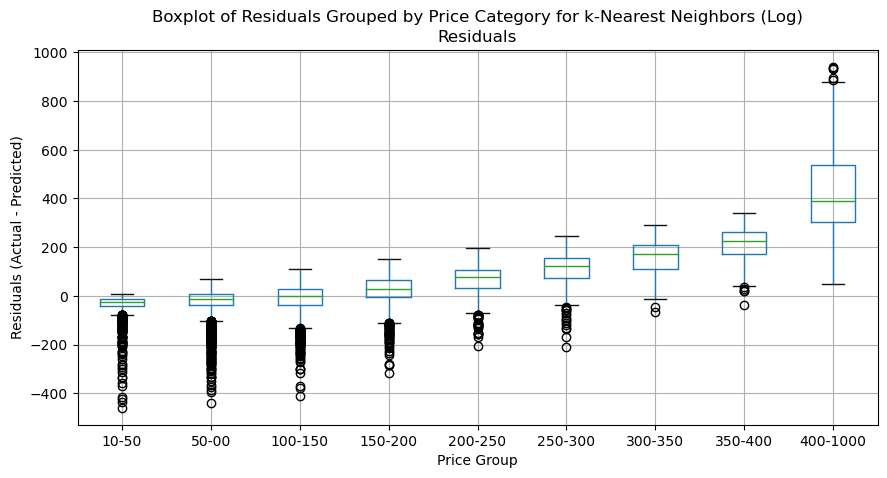

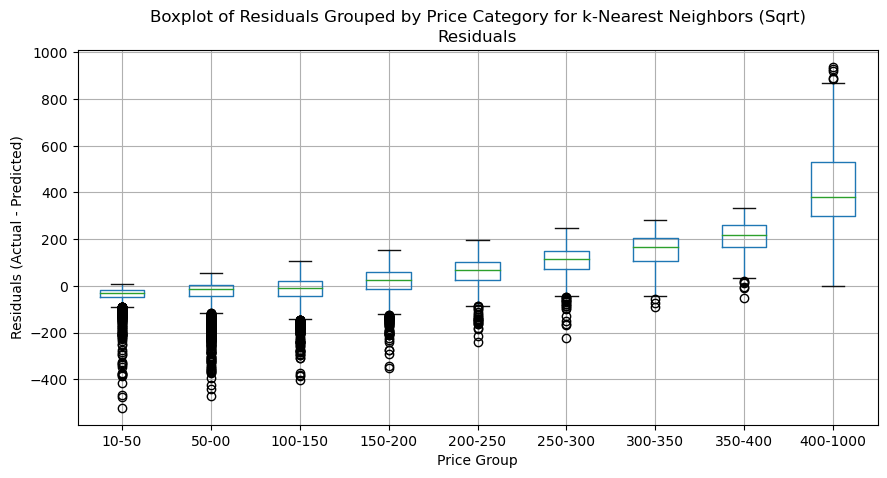

In [57]:
visualize_boxplot_diff(scaled_test_y, knn_pred, scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for k-Nearest Neighbors (Linear)', 'Price Group')
visualize_boxplot_diff(scaled_test_y, np.exp(knn_pred_log), scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for k-Nearest Neighbors (Log)', 'Price Group')
visualize_boxplot_diff(scaled_test_y, np.square(knn_pred_sqrt), scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for k-Nearest Neighbors (Sqrt)', 'Price Group')

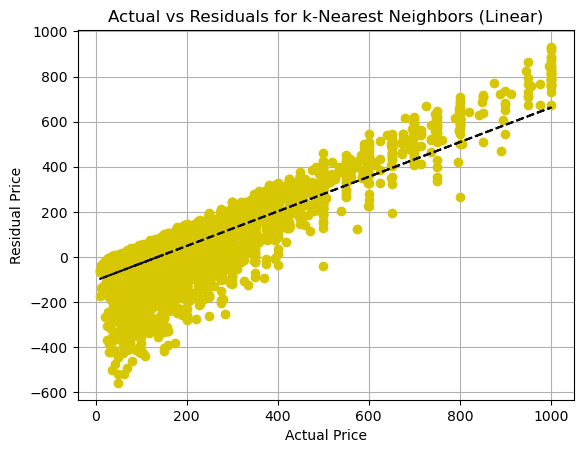

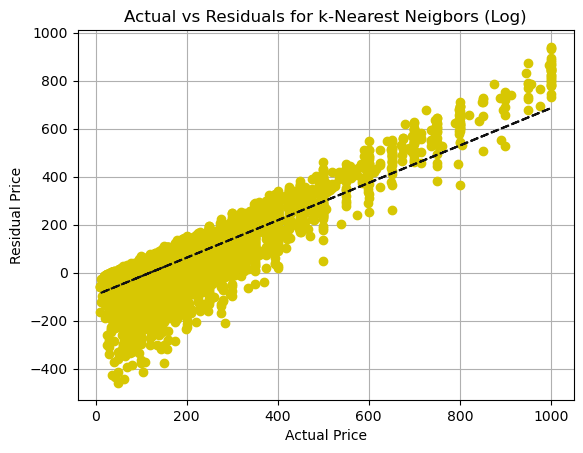

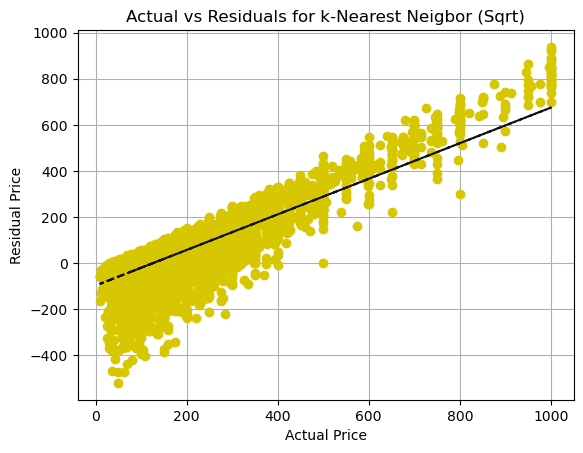

In [58]:
visualize_regression_diff(scaled_test_y, knn_pred, 'k-Nearest Neighbors (Linear)')
visualize_regression_diff(scaled_test_y, np.exp(knn_pred_log), 'k-Nearest Neigbors (Log)')
visualize_regression_diff(scaled_test_y, np.square(knn_pred_sqrt), 'k-Nearest Neigbor (Sqrt)')

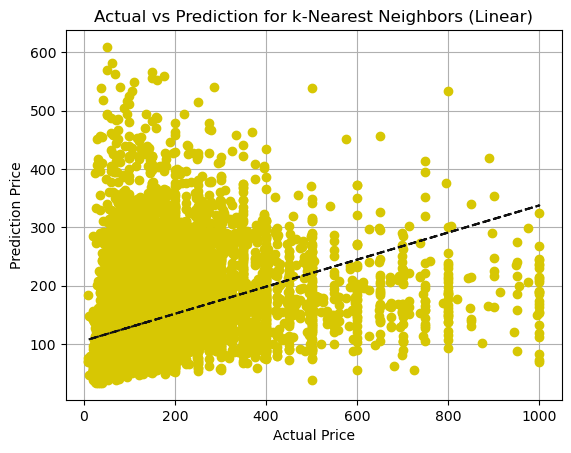

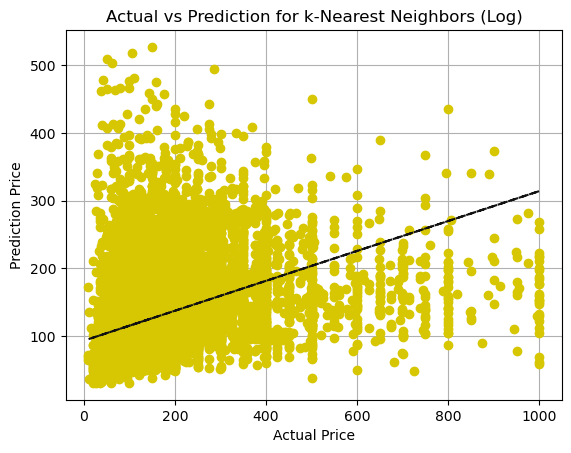

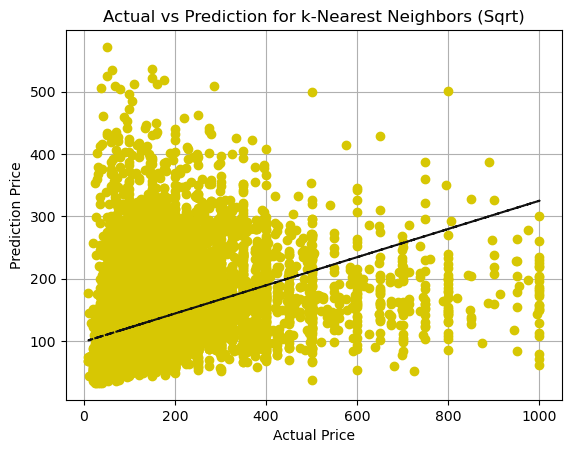

In [59]:
visualize_regression_actual(scaled_test_y, knn_pred, 'k-Nearest Neighbors (Linear)')
visualize_regression_actual(scaled_test_y, np.exp(knn_pred_log), 'k-Nearest Neighbors (Log)')
visualize_regression_actual(scaled_test_y, np.square(knn_pred_sqrt), 'k-Nearest Neighbors (Sqrt)')

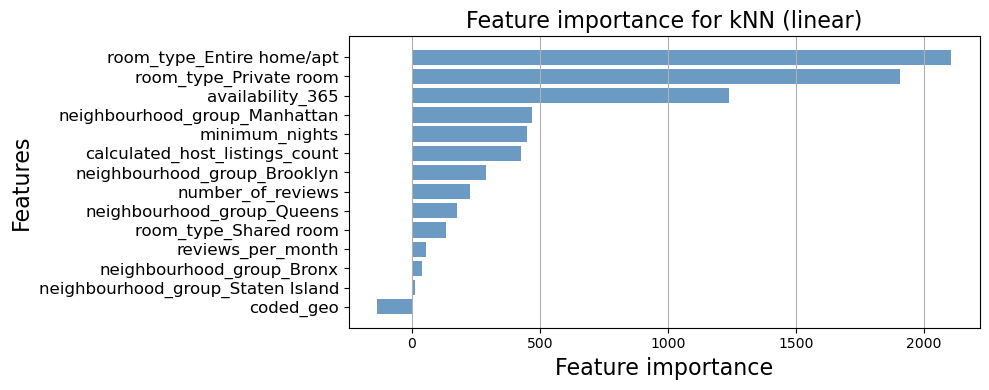

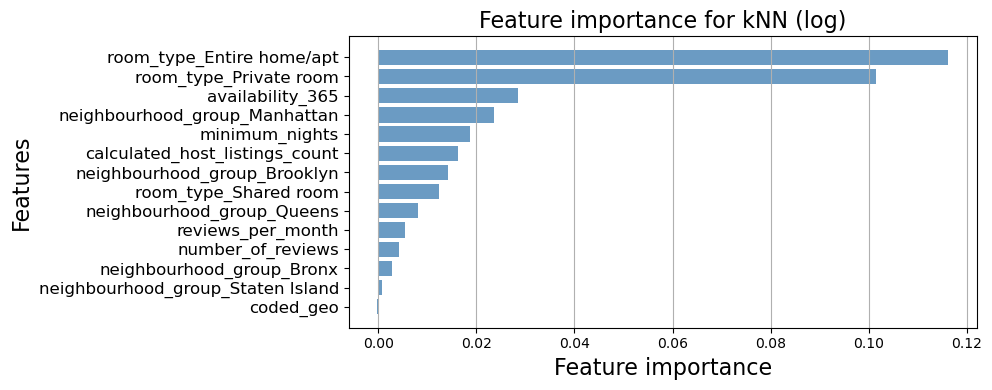

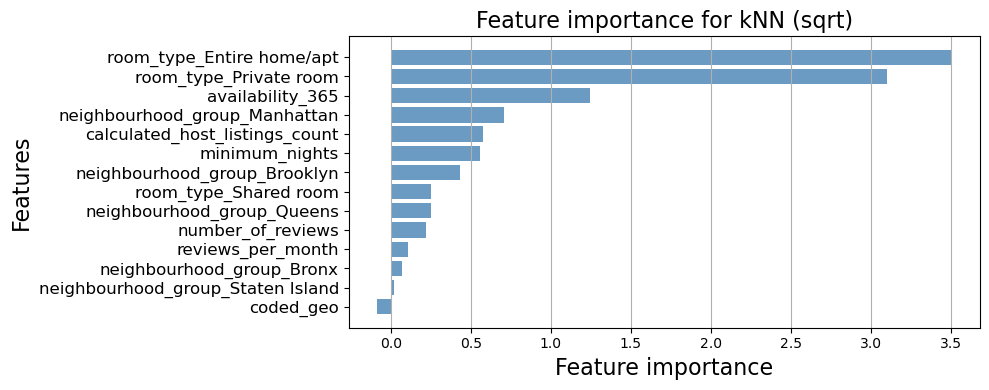

In [258]:
# get important features from knn
from sklearn.inspection import permutation_importance
def get_importance_knn(best_KNN_model, scaled_test_X, scaled_test_y, scaled_train, name):
    knn_results = permutation_importance(best_KNN_model, scaled_test_X, scaled_test_y, scoring='neg_mean_squared_error')
    importance_knn_best = knn_results.importances_mean
    names_knn_best = scaled_train.loc[:, scaled_train.columns != 'price'].columns.tolist()
    df_importantce_knn_best = pd.DataFrame({'Feature':names_knn_best, 'Importance':importance_knn_best})
    # plot feature importance
    rank_importance_knn_best = df_importantce_knn_best.sort_values('Importance', ascending=True)
    plot_feature_importance(rank_importance_knn_best,15, 'steelblue', 0.8, 10, 4, name)
get_importance_knn(best_KNN_model, scaled_test_X,scaled_test_y,scaled_train,  'Feature importance for kNN (linear)')
get_importance_knn(best_KNN_model_log, scaled_test_X,np.log(scaled_test_y),scaled_train, 'Feature importance for kNN (log)')
get_importance_knn(best_KNN_model_sqrt, scaled_test_X,np.sqrt(scaled_test_y),scaled_train, 'Feature importance for kNN (sqrt)')

# 3.4 SVM

In [61]:
# Linear
Grid_SVM = SVR(C = 1, kernel = 'linear')
Grid_SVM.fit(scaled_train_X, scaled_train_y)
best_SVM_linmodel = Grid_SVM
# Linear
Grid_SVM = SVR(C = 1)
Grid_SVM.fit(scaled_train_X, scaled_train_y)
best_SVM_model = Grid_SVM
# Log
Grid_SVM = SVR(C = 1)
Grid_SVM.fit(scaled_train_X, np.log(scaled_train_y))
best_SVM_model_log = Grid_SVM
# Sqrt
Grid_SVM = SVR(C = 1)
Grid_SVM.fit(scaled_train_X, np.sqrt(scaled_train_y))
best_SVM_model_sqrt = Grid_SVM

In [62]:
svm_pred = best_SVM_model.predict(scaled_test_X)
svm_pred_log = best_SVM_model_log.predict(scaled_test_X)
svm_pred_sqrt = best_SVM_model_sqrt.predict(scaled_test_X)
svm_linpred = best_SVM_linmodel.predict(scaled_test_X)

In [112]:
svm_pred = np.array([10 if i < 10 else i for i in svm_pred])
svm_pred_log = np.array([2.3 if i < 2.3 else i for i in svm_pred_log])
svm_pred_sqrt = np.array([3.16 if i < 3.16 else i for i in svm_pred_sqrt])
svm_linpred = np.array([10 if i < 10 else i for i in svm_linpred])
eval_grid[10,:] = evaluate(scaled_test_y, svm_linpred)
eval_grid[11,:] = evaluate(scaled_test_y, svm_pred)
eval_grid[12,:] = evaluate(scaled_test_y, np.exp(svm_pred_log))
eval_grid[13,:] = evaluate(scaled_test_y, np.square(svm_pred_sqrt))

MAPE of 2019 Airbnb price is 0.46584275819364146
MAE of 2019 Airbnb price is 60.93175356904288
MAD ratio of prediction in 2019 Airbnb price is 0.5004015892557963
R^2 of 2019 Airbnb price is 0.15811832976047047
MSLE of 2019 Airbnb price is 0.3009834196771076
Median Absolute Error of 2019 Airbnb price is 35.9423786684047
MSE of 2019 Airbnb price is 11736.474813292465
MAPE of 2019 Airbnb price is 0.44910902977263106
MAE of 2019 Airbnb price is 61.09621948763221
MAD ratio of prediction in 2019 Airbnb price is 0.5135288159355884
R^2 of 2019 Airbnb price is 0.1421325259173969
MSLE of 2019 Airbnb price is 0.30052541209784195
Median Absolute Error of 2019 Airbnb price is 34.176745292731994
MSE of 2019 Airbnb price is 11959.329153524253
MAPE of 2019 Airbnb price is 0.42664478082601043
MAE of 2019 Airbnb price is 61.105739290747145
MAD ratio of prediction in 2019 Airbnb price is 0.6134475800817827
R^2 of 2019 Airbnb price is 0.12151045758105383
MSLE of 2019 Airbnb price is 0.29634252219529766
Me

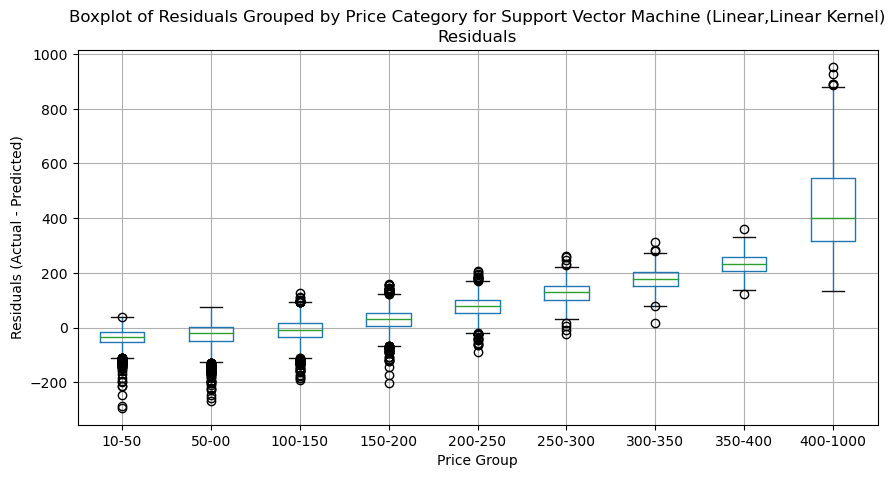

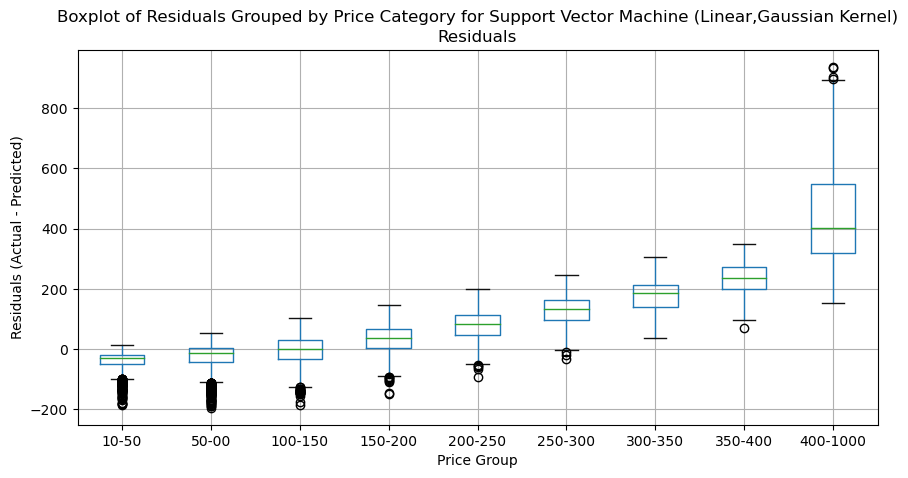

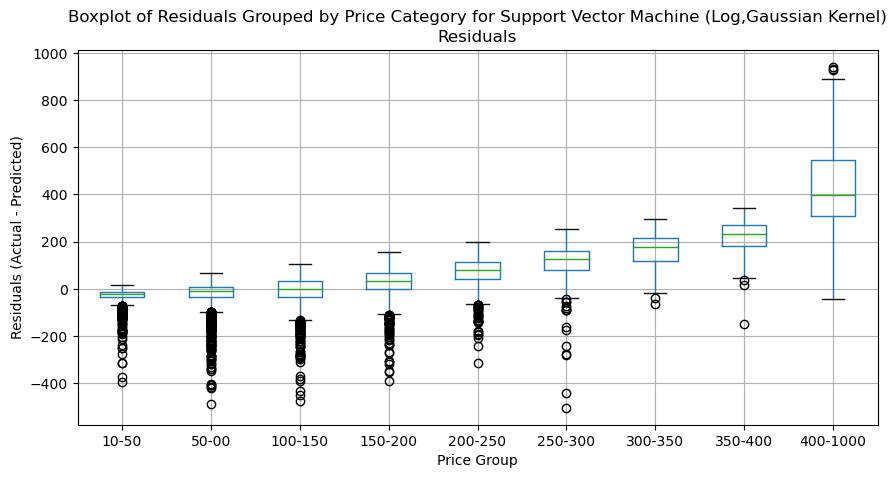

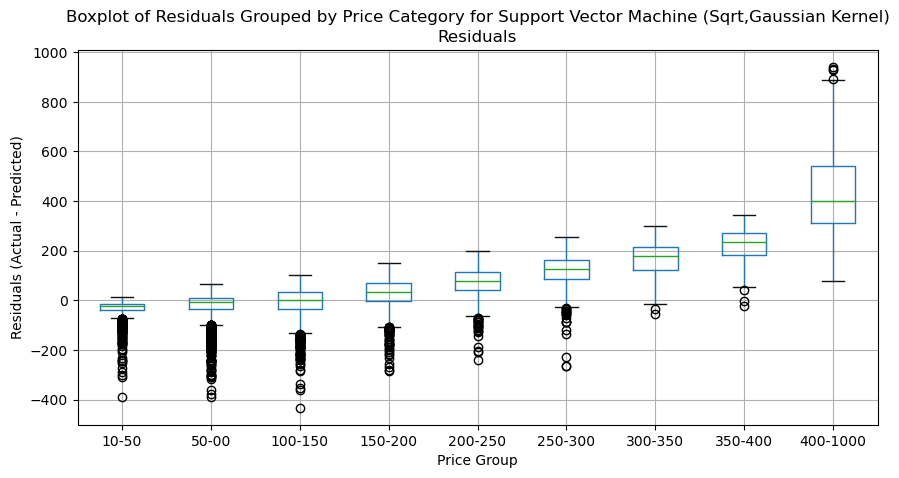

In [65]:
visualize_boxplot_diff(scaled_test_y, svm_linpred, scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for Support Vector Machine (Linear,Linear Kernel)', 'Price Group')
visualize_boxplot_diff(scaled_test_y, svm_pred, scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for Support Vector Machine (Linear,Gaussian Kernel)', 'Price Group')
visualize_boxplot_diff(scaled_test_y, np.exp(svm_pred_log), scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for Support Vector Machine (Log,Gaussian Kernel)', 'Price Group')
visualize_boxplot_diff(scaled_test_y, np.square(svm_pred_sqrt), scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for Support Vector Machine (Sqrt,Gaussian Kernel)', 'Price Group')

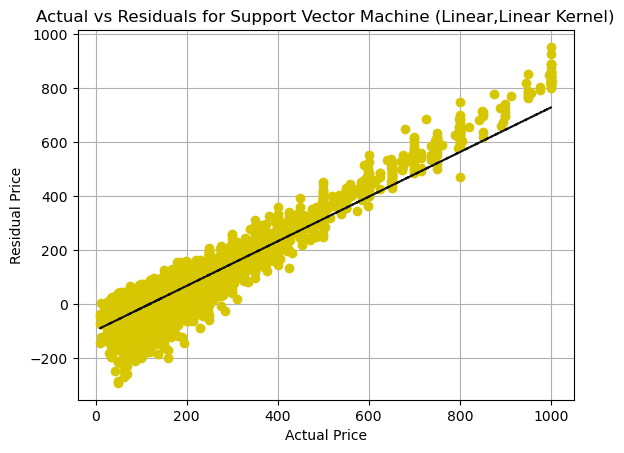

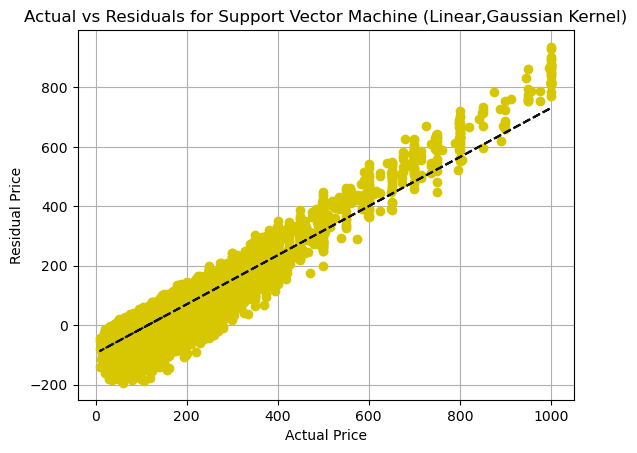

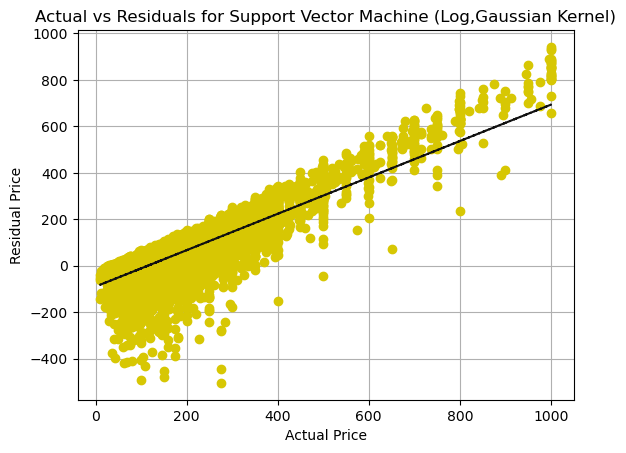

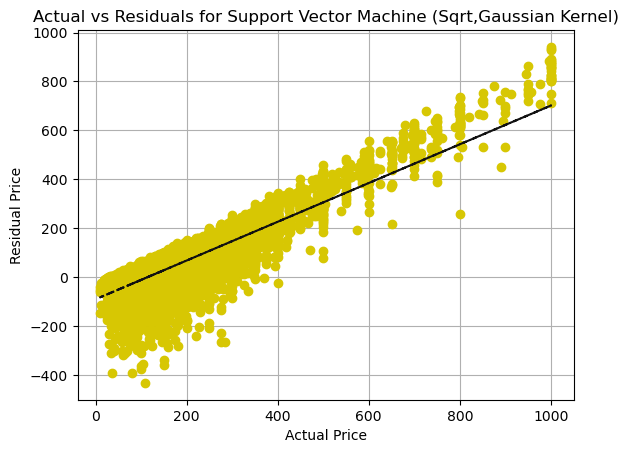

In [66]:
visualize_regression_diff(scaled_test_y, svm_linpred, 'Support Vector Machine (Linear,Linear Kernel)')
visualize_regression_diff(scaled_test_y, svm_pred, 'Support Vector Machine (Linear,Gaussian Kernel)')
visualize_regression_diff(scaled_test_y, np.exp(svm_pred_log), 'Support Vector Machine (Log,Gaussian Kernel)')
visualize_regression_diff(scaled_test_y, np.square(svm_pred_sqrt), 'Support Vector Machine (Sqrt,Gaussian Kernel)')

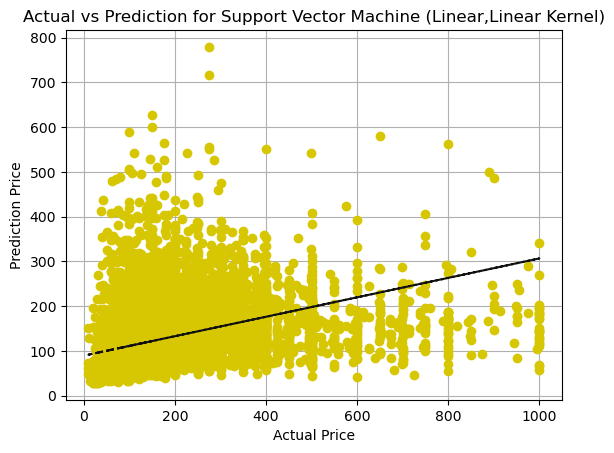

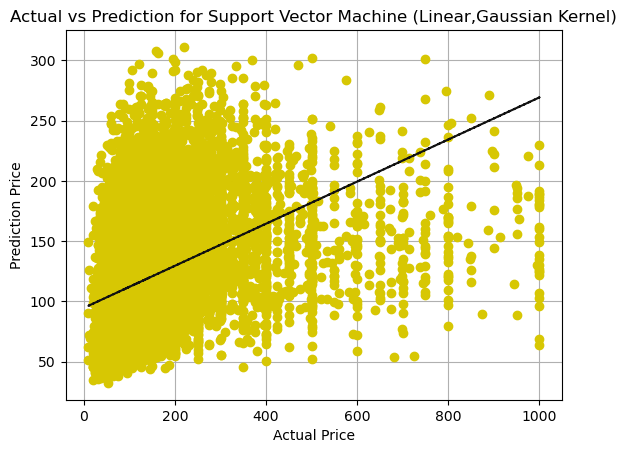

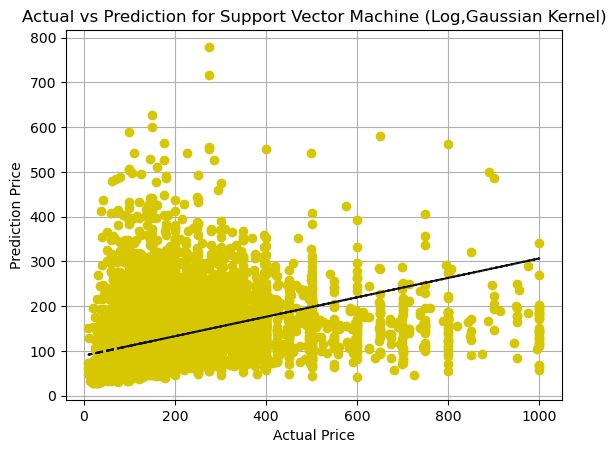

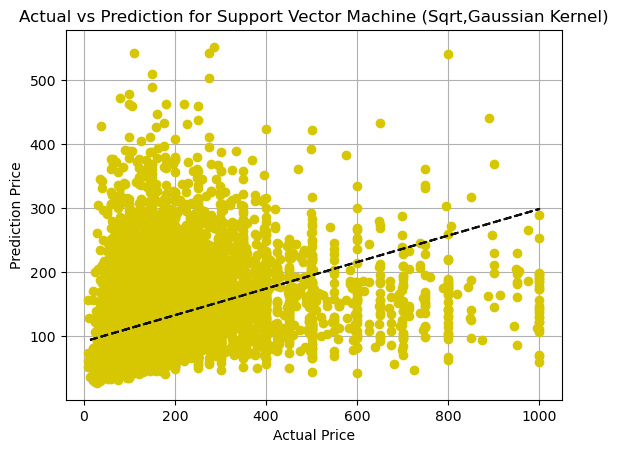

In [67]:
visualize_regression_actual(scaled_test_y, np.exp(svm_pred_log), 'Support Vector Machine (Linear,Linear Kernel)')
visualize_regression_actual(scaled_test_y, svm_pred, 'Support Vector Machine (Linear,Gaussian Kernel)')
visualize_regression_actual(scaled_test_y, np.exp(svm_pred_log), 'Support Vector Machine (Log,Gaussian Kernel)')
visualize_regression_actual(scaled_test_y, np.square(svm_pred_sqrt), 'Support Vector Machine (Sqrt,Gaussian Kernel)')

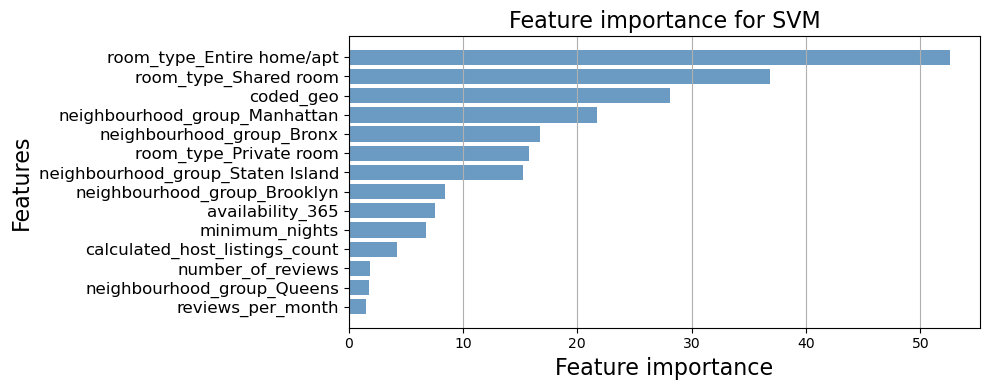

In [256]:
# get important features from SVM
def get_importance_SVM(best_SVM_model, scaled_train, name):
    importance_svm_best = abs(best_SVM_model.coef_[0])
    names_svm_best = scaled_train.loc[:, scaled_train.columns != 'price'].columns.tolist()
    df_importantce_svm_best = pd.DataFrame({'Feature':names_svm_best, 'Importance':importance_svm_best})
    # plot feature importance
    rank_importance_svm_best = df_importantce_svm_best.sort_values('Importance', ascending=True)
    plot_feature_importance(rank_importance_svm_best,15, 'steelblue', 0.8, 10, 4, 'Feature importance for SVM')

get_importance_SVM(best_SVM_linmodel, scaled_train, 'Feature importance for SVM (Linear,Linear Kernel)')

# 3.5 Random Forest Regression

In [137]:
#param_grid = {'n_estimators': [40,60,80,120,160,200,240,280,320],
#         'max_depth': [20,25,30,35,40]}  
# Best was 160, max_depth = 20 for all three
param_grid = {'n_estimators': [320],
        'max_depth': [20]}  
Grid_RF = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit = True, verbose = 3, cv =5) 
Grid_RF.fit(scaled_train_X, scaled_train_y)
print_grid_search_metrics(Grid_RF)
best_RF_model = Grid_RF.best_estimator_
best_RF_model.fit(scaled_train_X, scaled_train_y)

Grid_RF = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit = True, verbose = 3, cv =5) 
Grid_RF.fit(scaled_train_X, np.log(scaled_train_y))
print_grid_search_metrics(Grid_RF)
best_RF_model_log = Grid_RF.best_estimator_
best_RF_model_log.fit(scaled_train_X, np.log(scaled_train_y))

Grid_RF = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit = True, verbose = 3, cv =5) 
Grid_RF.fit(scaled_train_X, np.sqrt(scaled_train_y))
print_grid_search_metrics(Grid_RF)
best_RF_model_sqrt = Grid_RF.best_estimator_
best_RF_model_sqrt.fit(scaled_train_X, np.sqrt(scaled_train_y))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ....max_depth=20, n_estimators=320;, score=0.484 total time=  54.3s
[CV 2/5] END ....max_depth=20, n_estimators=320;, score=0.461 total time=  50.6s
[CV 3/5] END ....max_depth=20, n_estimators=320;, score=0.469 total time=  42.8s
[CV 4/5] END ....max_depth=20, n_estimators=320;, score=0.482 total time=  48.8s
[CV 5/5] END ....max_depth=20, n_estimators=320;, score=0.462 total time=  58.5s
Best score: 0.4717742384497604
Best parameters set:
max_depth:20
n_estimators:320
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ....max_depth=20, n_estimators=320;, score=0.636 total time=  44.8s
[CV 2/5] END ....max_depth=20, n_estimators=320;, score=0.632 total time=  41.1s
[CV 3/5] END ....max_depth=20, n_estimators=320;, score=0.641 total time=  40.9s
[CV 4/5] END ....max_depth=20, n_estimators=320;, score=0.638 total time=  44.2s
[CV 5/5] END ....max_depth=20, n_estimators=320;, score=0.623 total tim

RandomForestRegressor(max_depth=20, n_estimators=320, random_state=42)

In [138]:
rf_pred = best_RF_model.predict(scaled_test_X)
rf_pred_log = best_RF_model_log.predict(scaled_test_X)
rf_pred_sqrt = best_RF_model_sqrt.predict(scaled_test_X)

In [139]:
rf_pred = np.array([10 if i < 10 else i for i in rf_pred])
rf_pred_log = np.array([2.3 if i < 2.3 else i for i in rf_pred_log])
rf_pred_sqrt = np.array([3.16 if i < 3.16 else i for i in rf_pred_sqrt])
eval_grid[14,:] = evaluate(scaled_test_y, rf_pred)
eval_grid[15,:] = evaluate(scaled_test_y, np.exp(rf_pred_log))
eval_grid[16,:] = evaluate(scaled_test_y, np.square(rf_pred_sqrt))

MAPE of 2019 Airbnb price is 0.6126952513423345
MAE of 2019 Airbnb price is 72.47642346385626
MAD ratio of prediction in 2019 Airbnb price is 0.7764723344190206
R^2 of 2019 Airbnb price is -0.013976123211010938
MSLE of 2019 Airbnb price is 0.3913109554664751
Median Absolute Error of 2019 Airbnb price is 42.46759919787873
MSE of 2019 Airbnb price is 14135.603199390325
MAPE of 2019 Airbnb price is 0.4890740861858039
MAE of 2019 Airbnb price is 65.20054291102285
MAD ratio of prediction in 2019 Airbnb price is 0.6628864586252305
R^2 of 2019 Airbnb price is 0.08525567523101407
MSLE of 2019 Airbnb price is 0.3386786145527546
Median Absolute Error of 2019 Airbnb price is 35.8347316730841
MSE of 2019 Airbnb price is 12752.23598252102
MAPE of 2019 Airbnb price is 0.545290944432619
MAE of 2019 Airbnb price is 68.46546488739604
MAD ratio of prediction in 2019 Airbnb price is 0.7171415090096004
R^2 of 2019 Airbnb price is 0.04711560561877659
MSLE of 2019 Airbnb price is 0.36045131627475774
Median 

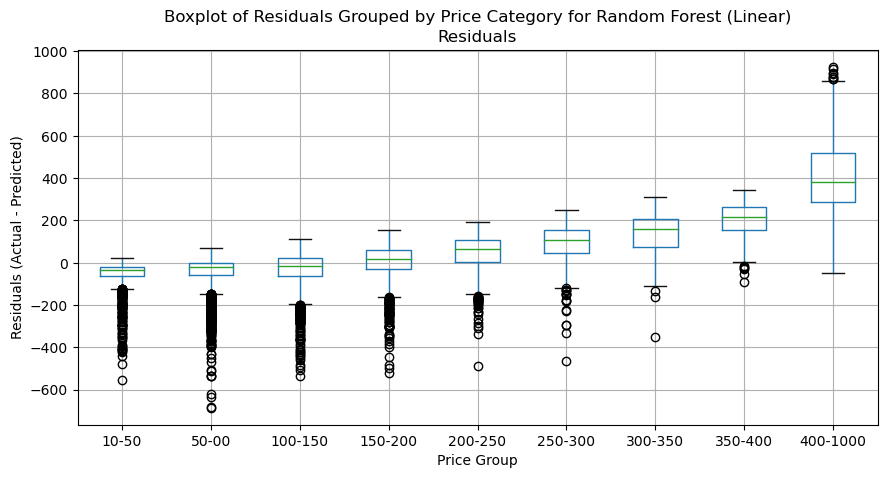

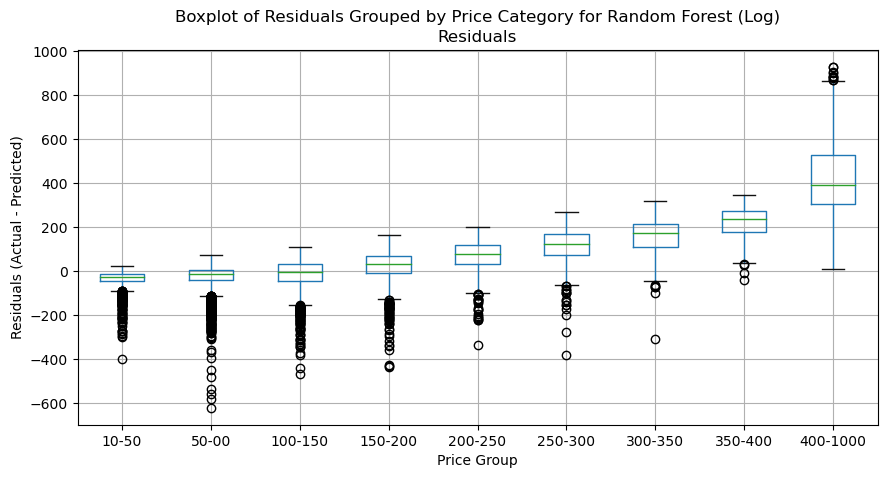

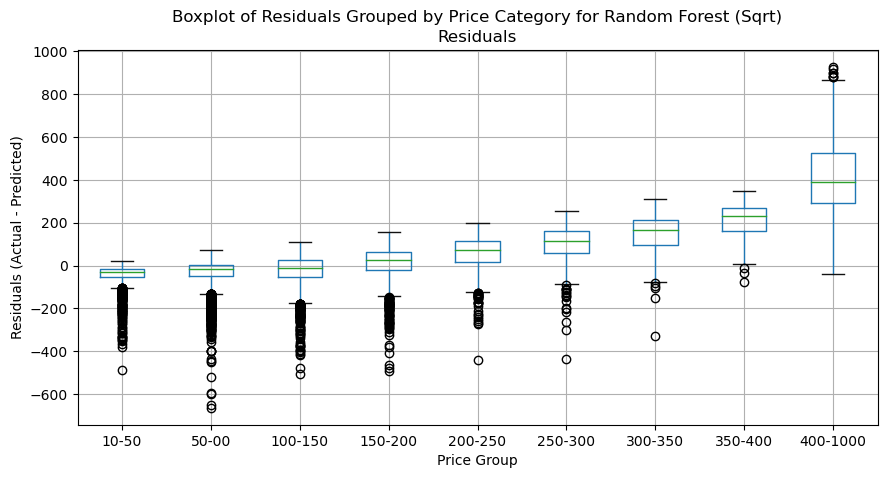

In [140]:
visualize_boxplot_diff(scaled_test_y, rf_pred, scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for Random Forest (Linear)', 'Price Group')
visualize_boxplot_diff(scaled_test_y, np.exp(rf_pred_log), scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for Random Forest (Log)', 'Price Group')
visualize_boxplot_diff(scaled_test_y, np.square(rf_pred_sqrt), scaled_test_y, 
                       [[10, 50, 100, 150, 200, 250, 300, 350, 400, 1000],
                      ['10-50','50-00','100-150','150-200','200-250','250-300','300-350','350-400','400-1000']],
                      'Price Category for Random Forest (Sqrt)', 'Price Group')

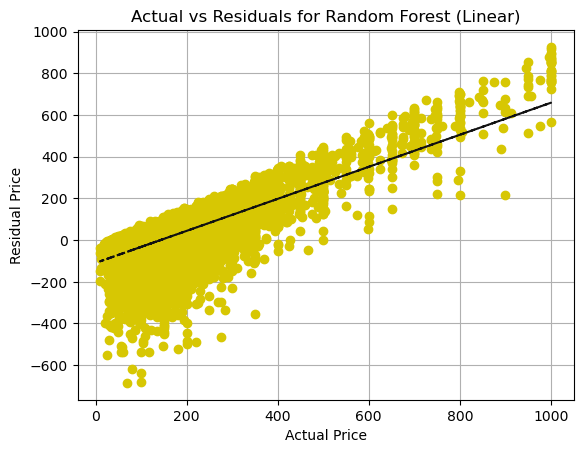

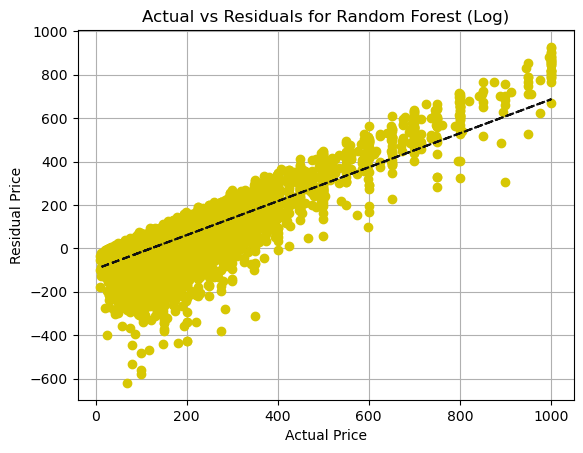

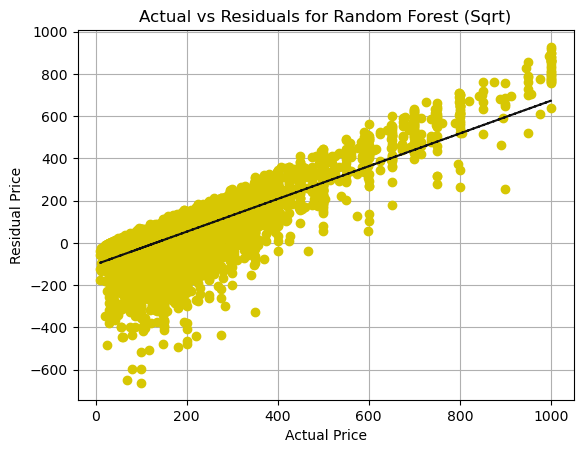

In [141]:
visualize_regression_diff(scaled_test_y, rf_pred, 'Random Forest (Linear)')
visualize_regression_diff(scaled_test_y, np.exp(rf_pred_log), 'Random Forest (Log)')
visualize_regression_diff(scaled_test_y, np.square(rf_pred_sqrt), 'Random Forest (Sqrt)')

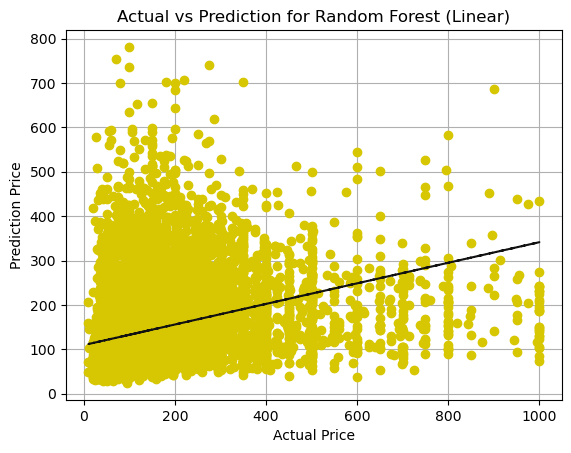

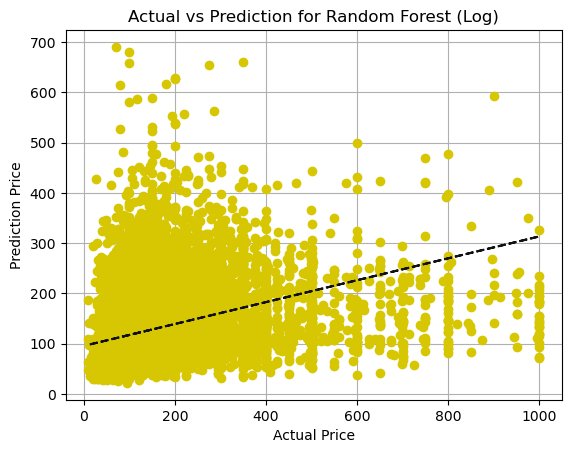

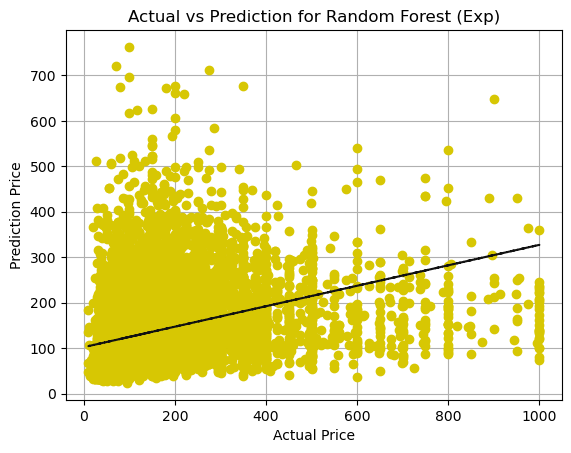

In [142]:
visualize_regression_actual(scaled_test_y, rf_pred, 'Random Forest (Linear)')
visualize_regression_actual(scaled_test_y, np.exp(rf_pred_log), 'Random Forest (Log)')
visualize_regression_actual(scaled_test_y, np.square(rf_pred_sqrt), 'Random Forest (Exp)')

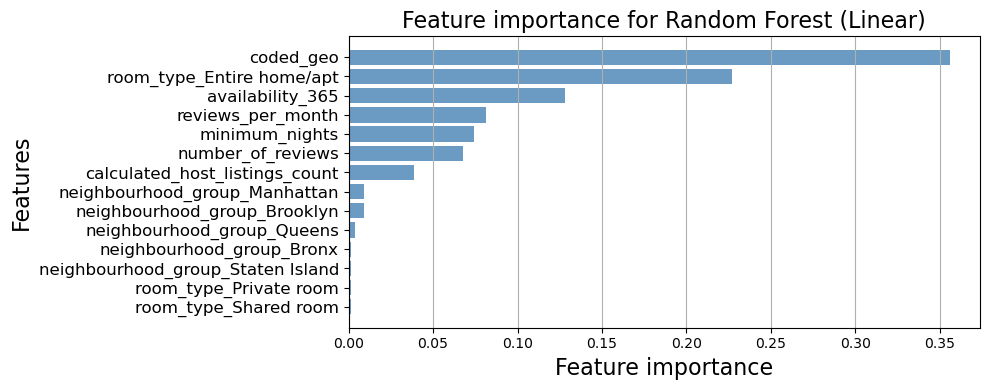

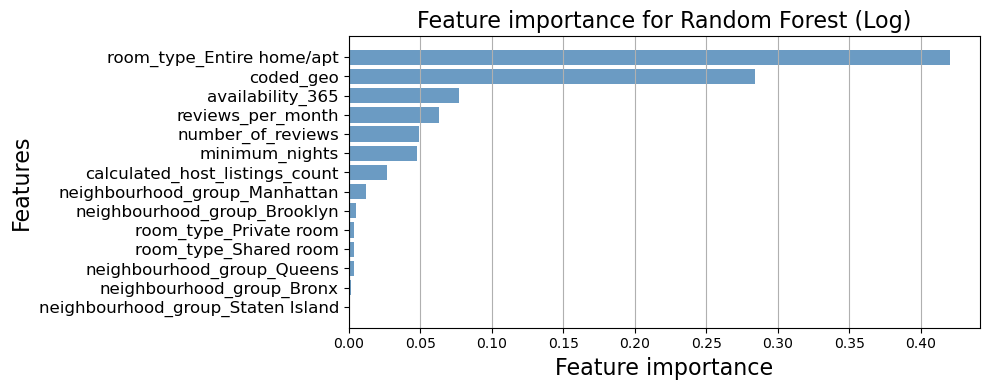

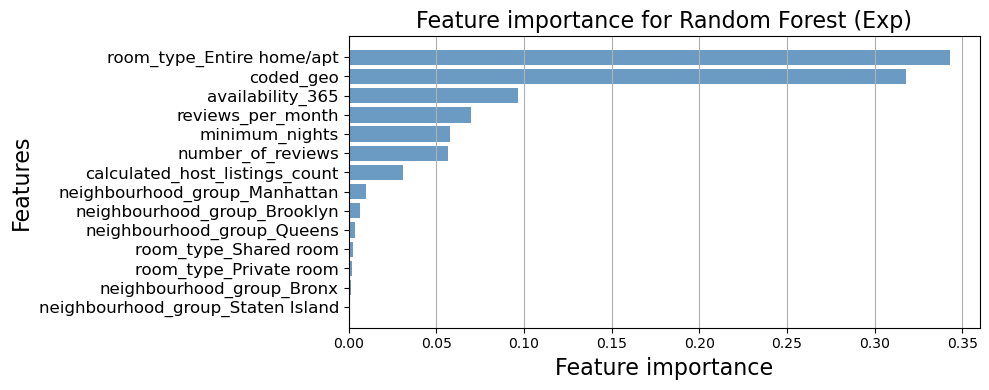

In [255]:
def get_importance_rf(best_RF_model, scaled_train, name):
    importance_rf_best = best_RF_model.feature_importances_
    names_rf_best = scaled_train.loc[:, scaled_train.columns != 'price'].columns.tolist()
    df_importantce_rf_best = pd.DataFrame({'Feature':names_rf_best, 'Importance':importance_rf_best})
    # plot feature importance
    rank_importance_rf_best = df_importantce_rf_best.sort_values('Importance', ascending=True)

    plot_feature_importance(rank_importance_rf_best,15, 'steelblue', 0.8, 10, 4, name)
get_importance_rf(best_RF_model, scaled_train, 'Feature importance for Random Forest (Linear)')
get_importance_rf(best_RF_model_log, scaled_train, 'Feature importance for Random Forest (Log)')
get_importance_rf(best_RF_model_sqrt, scaled_train, 'Feature importance for Random Forest (Exp)')

# 4. Saving the Data and Analysis by Group

In [181]:
df = pd.DataFrame(eval_grid, columns = ['MAPE', 'MAE', 'MAD_ratio', 'r2_score', 'MSLE', 'Median Absolute Error', 'MSE'],
                  index = ['Null','OLS (Linear)','OLS (Log)','OLS (Sqrt)','LASSO (Linear)', 'LASSO (Log)', 'LASSO (Sqrt)', 'kNN (Linear)', 'kNN (Log)', 'kNN (Sqrt)', 'SVM (Linear Kernel)','SVM (Linear/Gaussian)', 'SVM (Log/Gaussian)', 'SVM (Sqrt/Gaussian)',
        'Random Forest (Linear)', 'Random Forest (Log)', 'Random Forest (Sqrt)'])
df.to_csv("Metrics.csv", sep = ",")

In [177]:
all_data = pd.DataFrame({'Actual':scaled_test_y,
              'Null':np.mean(scaled_test_y).repeat(len(scaled_test_y)), 
              'OLS(Linear)':linear_pred,
              'OLS(Log)':np.exp(linear_pred_log),
              'OLS(Sqrt)':np.square(linear_pred_sqrt),
              'LASSO(Linear)':lasso_pred,
              'LASSO(Log)':np.exp(lasso_pred_log),
              'LASSO(Sqrt)':np.square(lasso_pred_sqrt),
              'kNN(Linear)':knn_pred,
              'kNN(Log)':np.exp(knn_pred_log),
              'kNN(Sqrt)':np.square(knn_pred_sqrt),
              'SVM(Linear Kernel)':svm_linpred,
              'SVM(Linear/Gaussian)':svm_pred,
              'SVM(Log/Gaussian)':np.exp(svm_pred_log),
              'SVM(Sqrt/Gaussian)':np.square(svm_pred_sqrt),
              'RandomForest(Linear)':rf_pred,
              'RandomForest(Log)':np.exp(rf_pred_log),
              'RandomForest(Sqrt)':np.square(rf_pred_sqrt)})
all_data.to_csv("TestModelData.csv", sep = ',')

In [178]:
columns = list(all_data)

absolute_error_data = pd.DataFrame({'Actual':all_data['Actual'],
                                'Null':abs(all_data['Actual']) - all_data['']
                               'OLS(Log)':abs(all_data['Actual'] - all_data['OLS(Log)']),
                               'LASSO(Log)':abs(all_data['Actual'] - all_data['LASSO(Log)']),
                              'kNN(Log)':abs(all_data['Actual'] - all_data['kNN(Log)']),
                             'SVM(Linear Kernel)':abs(all_data['Actual'] - all_data['SVM(Linear Kernel)']),
                              'RandomForest(Log)':abs(all_data['Actual'] - all_data['RandomForest(Log)'])})
for i in range()
absolute_error_data.to_csv("AbsoluteErrorTestModelDataTopFive.csv", sep = ",")
df_test_keep.to_csv("TestData.csv", sep = ",")

In [284]:
absolute_error_data = all_data.copy()
for column in all_data:
    absolute_error_data[column] = abs(all_data['Actual'] - all_data[column])
absolute_error_data = absolute_error_data.drop(columns = ['Actual'])
absolute_error_data['Quantile'] = pd.qcut(all_data['Actual'], 12)

In [285]:
absolute_error_data['Quantile'] = pd.qcut(all_data['Actual'], 12)
frame = absolute_error_data.groupby(["Quantile"]).median().T
error_by_decile = frame.style.format('{:.2f}').background_gradient()
error_by_decile

In [292]:
neigh = df_test_keep.iloc[:,5:10]
neigh.columns = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
absolute_error_data['Neighborhood'] = pd.Series(neigh.columns[np.where(neigh != 0)[1]])
frame = absolute_error_data.groupby(["Neighborhood"]).median().T
error_by_neighborhood = frame.style.format('{:.2f}').background_gradient()
error_by_neighborhood

In [297]:
neigh = df_test_keep.iloc[:,10:13]
neigh.columns = ['Entire home/apt', 'Private room', 'Shared room']
absolute_error_data['RoomType'] = pd.Series(neigh.columns[np.where(neigh != 0)[1]])
frame = absolute_error_data.groupby(["RoomType"]).median().T
error_by_roomtype = frame.style.format('{:.2f}').background_gradient()
error_by_roomtype

In [303]:
absolute_error_data['Quartile'] =  pd.qcut(all_data['Actual'], 4)
frame = absolute_error_data.groupby(["RoomType","Quartile"]).median().T
error_by_review = frame.style.format('{:.2f}').background_gradient()
error_by_review

In [304]:
format_mapping = {'MAPE': '{:.3f}', 'MAE': '{:.2f}', 'MAD_ratio':'{:.3f}', 'r2_score':'{:.2%}', 'MSLE':'{:.3f}',
                  'Median Absolute Error':'{:.2f}', 'MSE':'{:.0f}'}
df_styled = df.copy()
df_styled2 = df_styled.style.format(format_mapping).background_gradient()
df_styled2